# AQM: Commodities -  The 10’000 regressions challenge: apply data mining to identify the relationships

# Import Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy
import scipy.stats
import scipy as sp
import seaborn as sns
from math import exp, sqrt, log
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import xlsxwriter
import sys
import dataframe_image as dfi
import colorama
from colorama import Fore
import matplotlib.dates as mdates
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Monthly Data for Asset Prices: 10 Commodities and 10 Macroeconomic Variables

### Reading in Y-Data (Commodities)

In [5]:
path = r"C:\Users\Philné\Desktop\ZHAW\Semester 2\Advanced Quantitative Methods\Projects\AQM\Databases\WORKING\Commodities.xlsx"
y_var = pd.read_excel(path, dtype=None)
y_data = y_var.iloc[::-1]
y_data.tail()

,Date,CLc1,LCOc1,GCc1,SIc1,PLc1,NGc1,Wc1,Sc1,HOc1,Cc1
4,2012-07-31,88.06,104.92,1610.5,27.895,1415.4,3.209,888.25,1721.00,2.8417,806.50
3,2012-06-30,84.96,97.80,1603.5,27.580,1449.1,2.824,739.00,1512.75,2.6960,672.50
2,2012-05-31,86.53,101.87,1562.6,27.741,1416.1,2.422,643.75,1340.00,2.7062,555.25
1,2012-04-30,104.87,119.47,1663.4,30.959,1567.7,2.285,647.75,1503.00,3.1834,660.25
0,2012-03-31,103.02,122.88,1669.3,32.469,1638.3,2.126,660.75,1403.00,3.1684,644.00


### Reading in X-Data (Indicators)

In [7]:
path = r"C:\Users\Philné\Desktop\ZHAW\Semester 2\Advanced Quantitative Methods\Projects\AQM\Databases\WORKING\Indicators.xlsx"
x_var = pd.read_excel(path, dtype=None)
x_data = x_var.iloc[::-1]
x_data.tail()

,Date,TNX,VIX,USNFAR=ECI,EUIPY=ECI,USCURA=ECI,EURAST=ECI,USGDPF=ECI,EUGDPY=ECI,CNGDPA=ECI,BRGDPY=ECI
4,2012-07-31,16.516667,16.630000,113444.444444,-2.211111,-1.062667e+11,7.122300e+11,1.9,-0.866667,2.033333,1.500000
3,2012-06-30,16.590000,17.080000,85000.000000,-2.266667,-1.100000e+11,7.014600e+11,1.3,-0.800000,2.100000,1.000000
2,2012-05-31,18.446667,16.553333,151777.777778,-2.122222,-1.113000e+11,6.913700e+11,1.5,-0.700000,2.033333,1.233333
1,2012-04-30,20.303333,16.026667,218555.555556,-1.977778,-1.126000e+11,6.812800e+11,1.7,-0.600000,1.966667,1.466667
0,2012-03-31,22.160000,15.500000,285333.333333,-1.833333,-1.139000e+11,6.711900e+11,1.9,-0.500000,1.900000,1.700000


# Descriptive Statistics Entire Period (2012-2022)

In [8]:
#Descriptive Statistics whole period (Commodities)
Commoditytotal=y_var[['CLc1','LCOc1','GCc1','SIc1','PLc1','NGc1','Wc1','Sc1','HOc1','Cc1']]
Commoditytotal.columns.name='2012-2022'

#Descriptive Statistics whole period (Macroeconomic Indicators)
datasetdescribe = x_var[['TNX','VIX','USNFAR=ECI','EUIPY=ECI','USCURA=ECI','EURAST=ECI','USGDPF=ECI','EUGDPY=ECI','CNGDPA=ECI','BRGDPY=ECI']]
datasetdescribe.columns.name='2012-2022'

In [16]:
df_descrip_Y = Commoditytotal.describe()
df_descrip_Y
dfi.export(df_descrip_Y, 'DescriptiveY.png')

In [17]:
df_descrip_X = datasetdescribe.describe()
df_descrip_X
dfi.export(df_descrip_X, 'DescriptiveX.png')

## Histogram Checking Distribution

### Distribution of Commodities

Text(0, 0.5, 'Frequency')

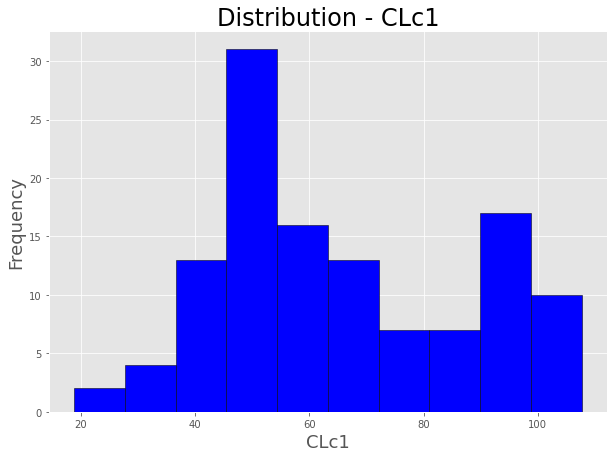

In [18]:
plt.style.use('ggplot')
y_var.iloc[:,1].plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - CLc1', size=24)
plt.xlabel('CLc1', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

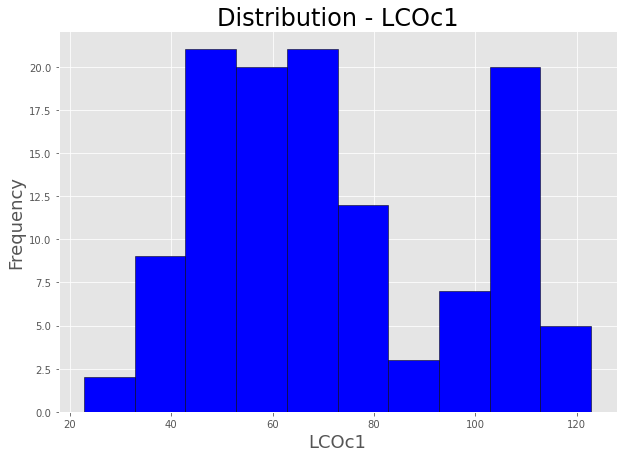

In [19]:
plt.style.use('ggplot')
y_var.iloc[:,2].plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - LCOc1', size=24)
plt.xlabel('LCOc1', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

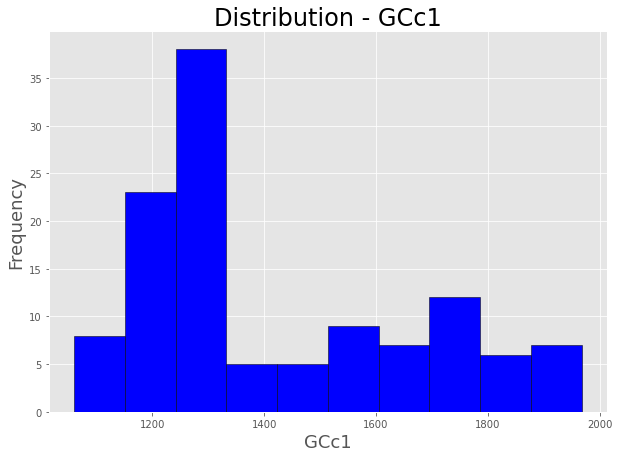

In [20]:
plt.style.use('ggplot')
y_var.iloc[:,3].plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - GCc1', size=24)
plt.xlabel('GCc1', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

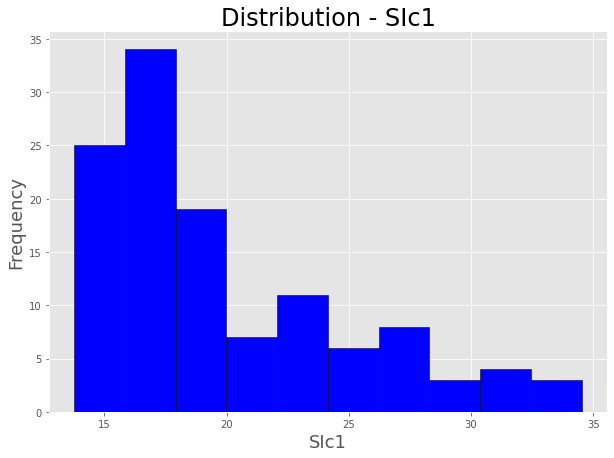

In [21]:
plt.style.use('ggplot')
y_var.iloc[:,4].plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - SIc1', size=24)
plt.xlabel('SIc1', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

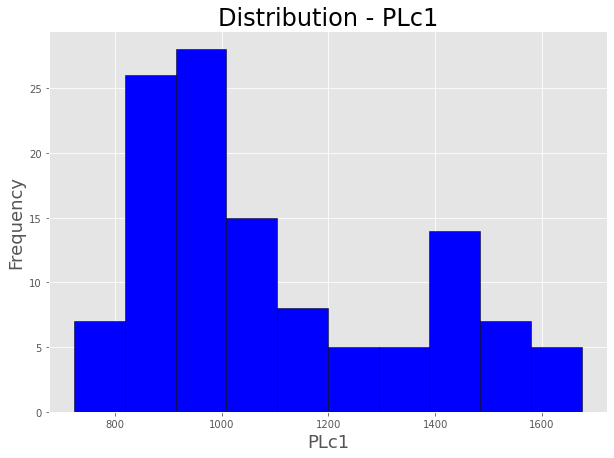

In [22]:
plt.style.use('ggplot')
y_var.iloc[:,5].plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - PLc1', size=24)
plt.xlabel('PLc1', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

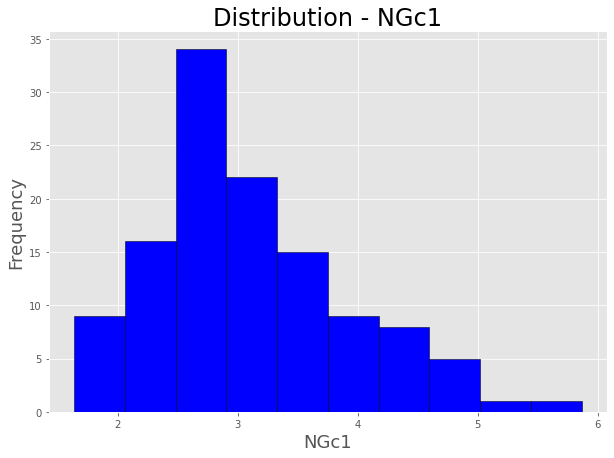

In [23]:
plt.style.use('ggplot')
y_var.iloc[:,6].plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - NGc1', size=24)
plt.xlabel('NGc1', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

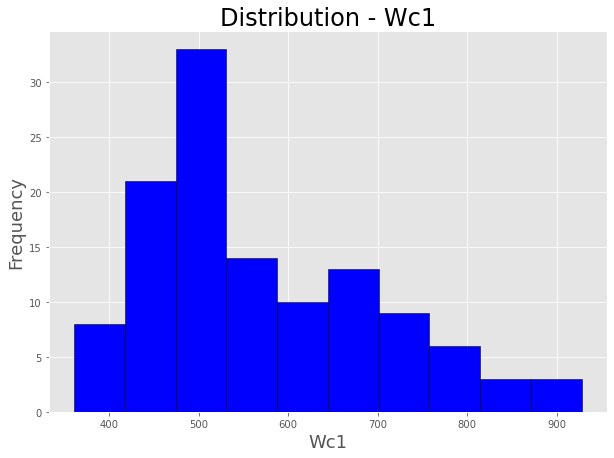

In [24]:
plt.style.use('ggplot')
y_var.iloc[:,7].plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - Wc1', size=24)
plt.xlabel('Wc1', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

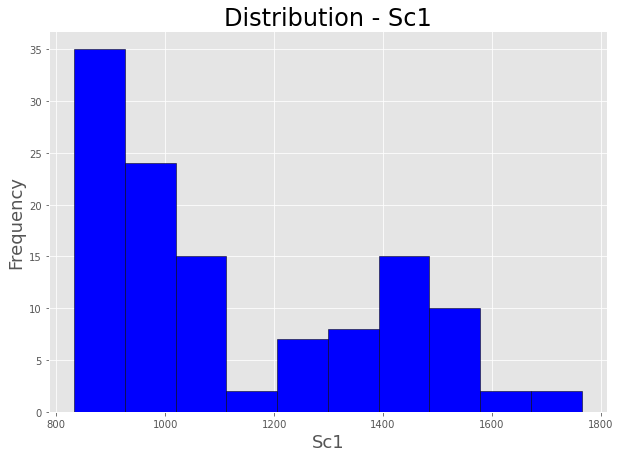

In [25]:
plt.style.use('ggplot')
y_var.iloc[:,8].plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - Sc1', size=24)
plt.xlabel('Sc1', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

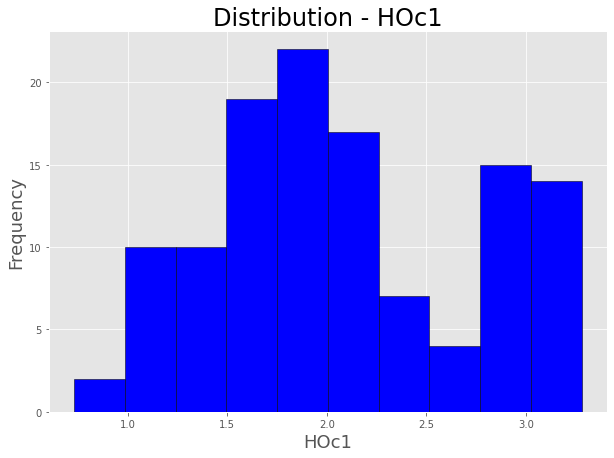

In [26]:
plt.style.use('ggplot')
y_var.iloc[:,9].plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - HOc1', size=24)
plt.xlabel('HOc1', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

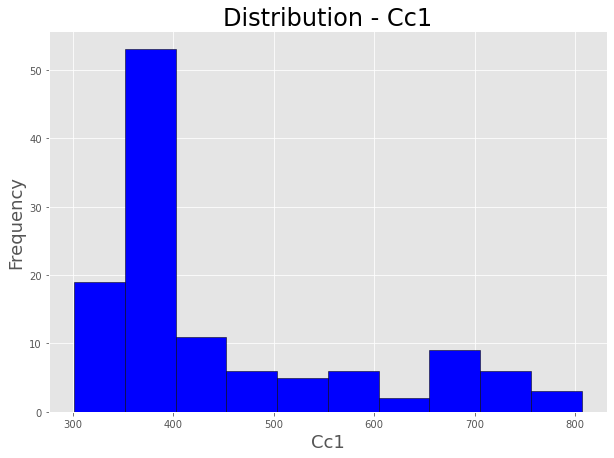

In [27]:
plt.style.use('ggplot')
y_var.iloc[:,-1].plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution - Cc1', size=24)
plt.xlabel('Cc1', size=18)
plt.ylabel('Frequency', size=18)

### Distribution of Indicators

Text(0, 0.5, 'Frequency')

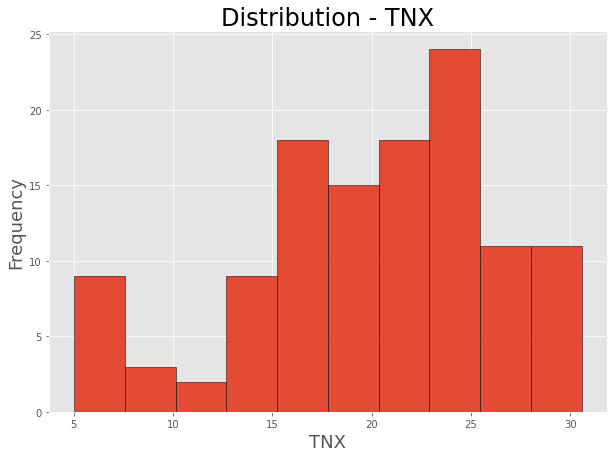

In [28]:
plt.style.use('ggplot')
x_var.iloc[:,1].plot(kind='hist', edgecolor='black', figsize=(10,7))
plt.title('Distribution - TNX', size=24)
plt.xlabel('TNX', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

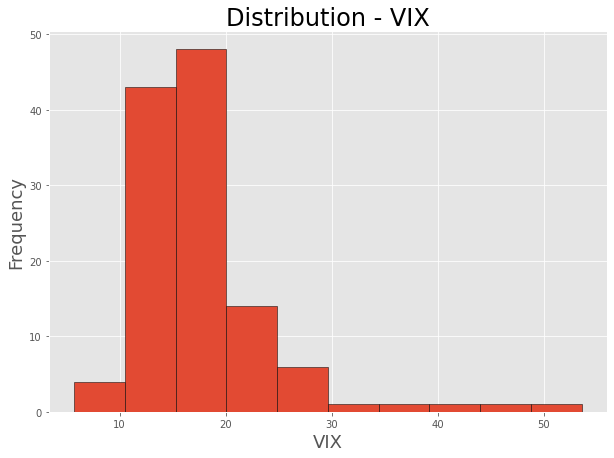

In [29]:
plt.style.use('ggplot')
x_var.iloc[:,2].plot(kind='hist', edgecolor='black', figsize=(10,7))
plt.title('Distribution - VIX', size=24)
plt.xlabel('VIX', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

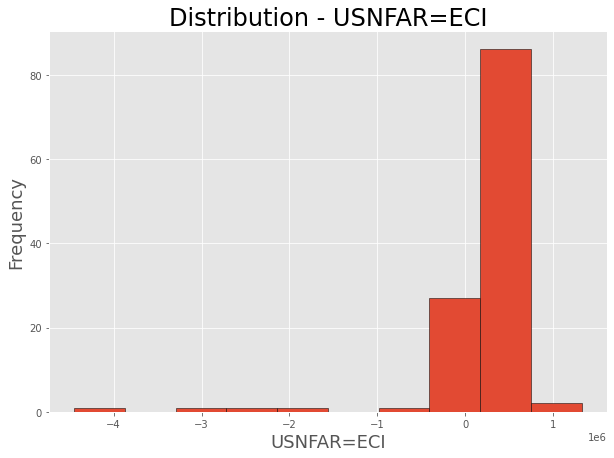

In [30]:
plt.style.use('ggplot')
x_var.iloc[:,3].plot(kind='hist', edgecolor='black', figsize=(10,7))
plt.title('Distribution - USNFAR=ECI', size=24)
plt.xlabel('USNFAR=ECI', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

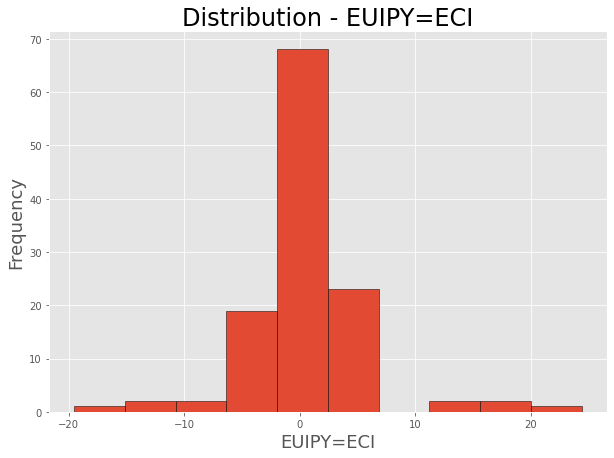

In [31]:
plt.style.use('ggplot')
x_var.iloc[:,4].plot(kind='hist', edgecolor='black', figsize=(10,7))
plt.title('Distribution - EUIPY=ECI', size=24)
plt.xlabel('EUIPY=ECI', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

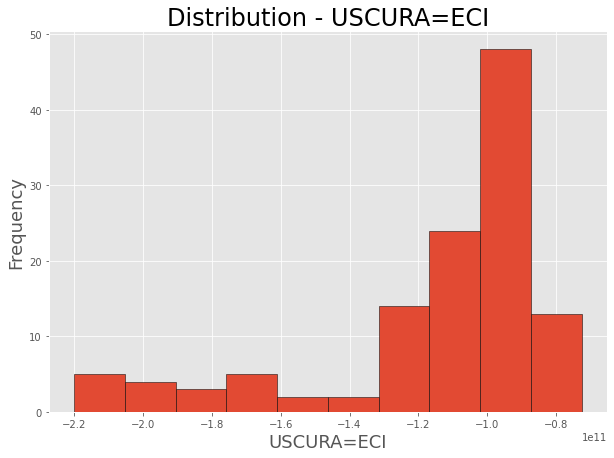

In [32]:
plt.style.use('ggplot')
x_var.iloc[:,5].plot(kind='hist', edgecolor='black', figsize=(10,7))
plt.title('Distribution - USCURA=ECI', size=24)
plt.xlabel('USCURA=ECI', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

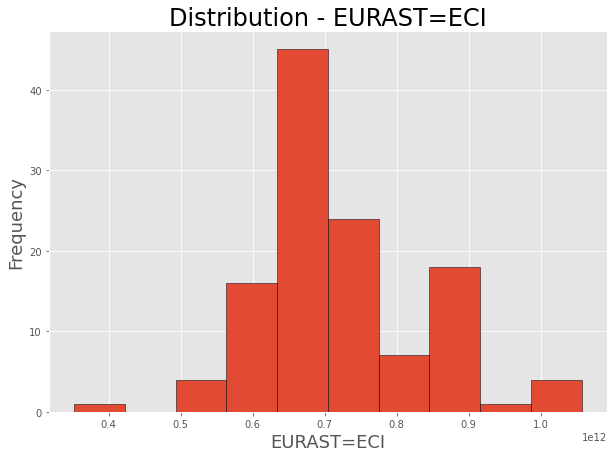

In [33]:
plt.style.use('ggplot')
x_var.iloc[:,6].plot(kind='hist', edgecolor='black', figsize=(10,7))
plt.title('Distribution - EURAST=ECI', size=24)
plt.xlabel('EURAST=ECI', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

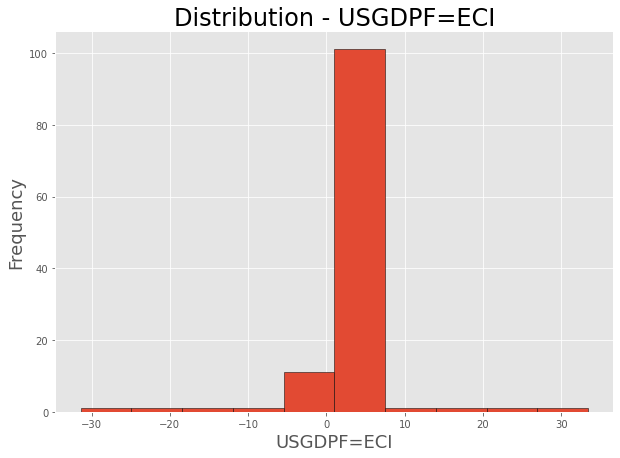

In [34]:
plt.style.use('ggplot')
x_var.iloc[:,7].plot(kind='hist', edgecolor='black', figsize=(10,7))
plt.title('Distribution - USGDPF=ECI', size=24)
plt.xlabel('USGDPF=ECI', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

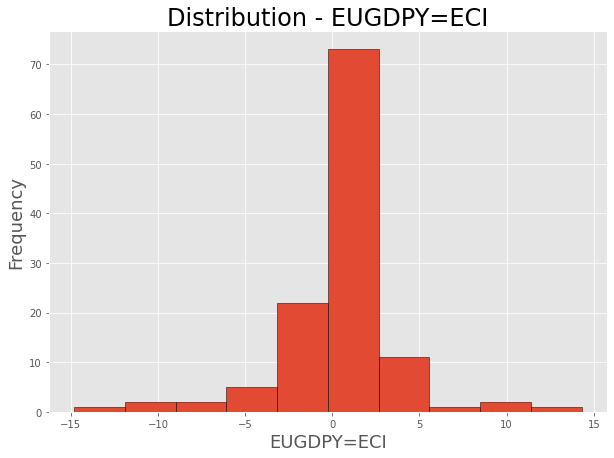

In [35]:
plt.style.use('ggplot')
x_var.iloc[:,8].plot(kind='hist', edgecolor='black', figsize=(10,7))
plt.title('Distribution - EUGDPY=ECI', size=24)
plt.xlabel('EUGDPY=ECI', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

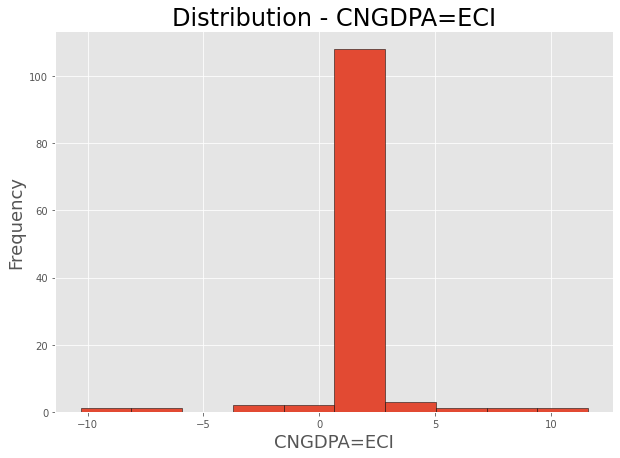

In [36]:
plt.style.use('ggplot')
x_var.iloc[:,9].plot(kind='hist', edgecolor='black', figsize=(10,7))
plt.title('Distribution - CNGDPA=ECI', size=24)
plt.xlabel('CNGDPA=ECI', size=18)
plt.ylabel('Frequency', size=18)

Text(0, 0.5, 'Frequency')

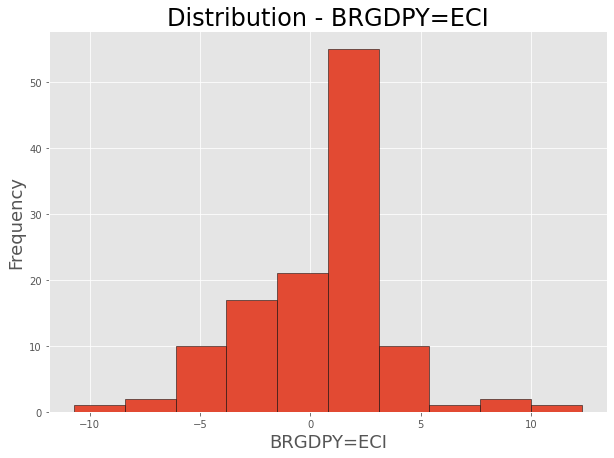

In [37]:
plt.style.use('ggplot')
x_var.iloc[:,-1].plot(kind='hist', edgecolor='black', figsize=(10,7))
plt.title('Distribution - BRGDPY=ECI', size=24)
plt.xlabel('BRGDPY=ECI', size=18)
plt.ylabel('Frequency', size=18)

### Sample Output of Commodities and Indicators

### Commodities

array([[<AxesSubplot:title={'center':'CLc1'}>,
        <AxesSubplot:title={'center':'LCOc1'}>,
        <AxesSubplot:title={'center':'GCc1'}>],
       [<AxesSubplot:title={'center':'SIc1'}>,
        <AxesSubplot:title={'center':'PLc1'}>,
        <AxesSubplot:title={'center':'NGc1'}>],
       [<AxesSubplot:title={'center':'Wc1'}>,
        <AxesSubplot:title={'center':'Sc1'}>,
        <AxesSubplot:title={'center':'HOc1'}>],
       [<AxesSubplot:title={'center':'Cc1'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

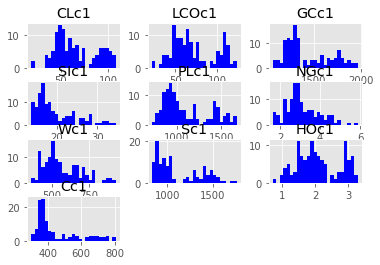

In [47]:
yvarh = y_var.copy()
yvarh.drop(axis = 1, columns = 'Date', inplace = True)
yvarh.hist(bins=25, color='blue')

### Indicators

array([[<AxesSubplot:title={'center':'TNX'}>,
        <AxesSubplot:title={'center':'VIX'}>,
        <AxesSubplot:title={'center':'USNFAR=ECI'}>],
       [<AxesSubplot:title={'center':'EUIPY=ECI'}>,
        <AxesSubplot:title={'center':'USCURA=ECI'}>,
        <AxesSubplot:title={'center':'EURAST=ECI'}>],
       [<AxesSubplot:title={'center':'USGDPF=ECI'}>,
        <AxesSubplot:title={'center':'EUGDPY=ECI'}>,
        <AxesSubplot:title={'center':'CNGDPA=ECI'}>],
       [<AxesSubplot:title={'center':'BRGDPY=ECI'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

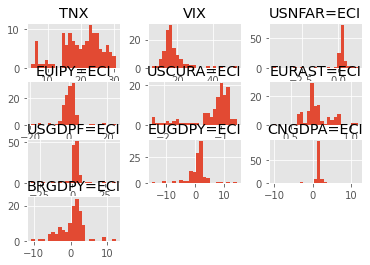

In [39]:
xvarh = x_var.copy()
xvarh.drop(axis = 1, columns = 'Date', inplace = True)
xvarh.hist(bins=25)

# Normality Tests (Shapiro-Wilk Tests)¶

===============Commodities====================
p-value for Shapiro-Wilk: 
1.6179166777874343e-05
Sample does not look Gaussian (reject H0)
_____________________________________________
p-value for Shapiro-Wilk: 
7.849181201891042e-06
Sample does not look Gaussian (reject H0)
_____________________________________________
p-value for Shapiro-Wilk: 
7.20874027138052e-08
Sample does not look Gaussian (reject H0)
_____________________________________________
p-value for Shapiro-Wilk: 
1.7024287757294587e-08
Sample does not look Gaussian (reject H0)
_____________________________________________
p-value for Shapiro-Wilk: 
4.60718077022193e-08
Sample does not look Gaussian (reject H0)
_____________________________________________
p-value for Shapiro-Wilk: 
0.00037855468690395355
Sample does not look Gaussian (reject H0)
_____________________________________________
p-value for Shapiro-Wilk: 
2.2689475372317247e-05
Sample does not look Gaussian (reject H0)
______________________________________

# Stationarity Tests

### Commodities

In [52]:
commodity=['CLc1','LCOc1','GCc1','SIc1','PLc1','NGc1','Wc1','Sc1','HOc1','Cc1']

for i in commodity:
    for lags in range(1,3):
        print('Number of lags used:',lags)

        adf_library = adfuller(y_var[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(y_var[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,'in Level','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library[1],'\n')

        print(i,'in 1st Difference','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library_d[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library_d[1],'\n')
    print('____________________________________________','\n')        

Number of lags used: 1
CLc1 in Level 
 ADF Stat (Library) for CLc1 : -0.74 
 ADF P-Val (Library) CLc1 : 0.40 

CLc1 in 1st Difference 
 ADF Stat (Library) for CLc1 : -7.77 
 ADF P-Val (Library) CLc1 : 0.00 

Number of lags used: 2
CLc1 in Level 
 ADF Stat (Library) for CLc1 : -0.34 
 ADF P-Val (Library) CLc1 : 0.56 

CLc1 in 1st Difference 
 ADF Stat (Library) for CLc1 : -6.53 
 ADF P-Val (Library) CLc1 : 0.00 

____________________________________________ 

Number of lags used: 1
LCOc1 in Level 
 ADF Stat (Library) for LCOc1 : -0.82 
 ADF P-Val (Library) LCOc1 : 0.36 

LCOc1 in 1st Difference 
 ADF Stat (Library) for LCOc1 : -7.34 
 ADF P-Val (Library) LCOc1 : 0.00 

Number of lags used: 2
LCOc1 in Level 
 ADF Stat (Library) for LCOc1 : -0.47 
 ADF P-Val (Library) LCOc1 : 0.51 

LCOc1 in 1st Difference 
 ADF Stat (Library) for LCOc1 : -6.77 
 ADF P-Val (Library) LCOc1 : 0.00 

____________________________________________ 

Number of lags used: 1
GCc1 in Level 
 ADF Stat (Library) for 

In [53]:
#At a significance level of 0.05, for all commodities the data is non-stationary in level but stationary in the 1st difference.

### Indicators

In [54]:
indicator=['TNX','VIX','USNFAR=ECI','EUIPY=ECI','USCURA=ECI','EURAST=ECI','USGDPF=ECI','EUGDPY=ECI','CNGDPA=ECI','BRGDPY=ECI']

for i in indicator:
    for lags in range(1,3):
        print('Number of lags used:',lags)

        adf_library = adfuller(x_var[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(x_var[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,'in Level','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library[1],'\n')

        print(i,'in 1st Difference','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library_d[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library_d[1],'\n')
    print('____________________________________________','\n')

Number of lags used: 1
TNX in Level 
 ADF Stat (Library) for TNX : -1.04 
 ADF P-Val (Library) TNX : 0.27 

TNX in 1st Difference 
 ADF Stat (Library) for TNX : -4.74 
 ADF P-Val (Library) TNX : 0.00 

Number of lags used: 2
TNX in Level 
 ADF Stat (Library) for TNX : -0.90 
 ADF P-Val (Library) TNX : 0.33 

TNX in 1st Difference 
 ADF Stat (Library) for TNX : -5.39 
 ADF P-Val (Library) TNX : 0.00 

____________________________________________ 

Number of lags used: 1
VIX in Level 
 ADF Stat (Library) for VIX : -1.74 
 ADF P-Val (Library) VIX : 0.08 

VIX in 1st Difference 
 ADF Stat (Library) for VIX : -6.83 
 ADF P-Val (Library) VIX : 0.00 

Number of lags used: 2
VIX in Level 
 ADF Stat (Library) for VIX : -1.31 
 ADF P-Val (Library) VIX : 0.17 

VIX in 1st Difference 
 ADF Stat (Library) for VIX : -8.99 
 ADF P-Val (Library) VIX : 0.00 

____________________________________________ 

Number of lags used: 1
USNFAR=ECI in Level 
 ADF Stat (Library) for USNFAR=ECI : -6.77 
 ADF P-Val

In [55]:
#At a significance level of 0.05
#TNX,VIX and EURAST=ECI is non-stationary in level but stationary in the first difference
#USNFAR=ECI, EUIPY=ECI, USGDPF=ECI, EUGDPY=ECI, CNGDPA=ECI and BRGDPY=ECI is stationary in level and in the first difference
#USCURA=ECI is non-stationary in level and in the first difference

In [ ]:
#Apply first difference to all data in new excel sheets

# OLS Regressions using First Difference Data

In [56]:
#import new first difference data

In [57]:
path = r'C:\Users\Philné\Desktop\ZHAW\Semester 2\Advanced Quantitative Methods\Projects\AQM\Databases\WORKING\Commodities - 1st Diff.xlsx'
y_var_diff = pd.read_excel(path, dtype=None)

y_data_diff = y_var_diff.iloc[::-1]

y_data_diff.tail()

,Date,CLc1,LCOc1,GCc1,SIc1,PLc1,NGc1,Wc1,Sc1,HOc1,Cc1
4,2012-08-31,8.41,9.65,74.1,3.475,120.9,-0.410,-18.25,43.50,0.3279,-3.75
3,2012-07-31,3.10,7.12,7.0,0.315,-33.7,0.385,149.25,208.25,0.1457,134.00
2,2012-06-30,-1.57,-4.07,40.9,-0.161,33.0,0.402,95.25,172.75,-0.0102,117.25
1,2012-05-31,-18.34,-17.60,-100.8,-3.218,-151.6,0.137,-4.00,-163.00,-0.4772,-105.00
0,2012-04-30,1.85,-3.41,-5.9,-1.510,-70.6,0.159,-13.00,100.00,0.0150,16.25


In [58]:
path = r'C:\Users\Philné\Desktop\ZHAW\Semester 2\Advanced Quantitative Methods\Projects\AQM\Databases\WORKING\Indicators - 1st Diff.xlsx'
x_var_diff = pd.read_excel(path, dtype=None)

x_data_diff = x_var_diff.iloc[::-1]

x_data_diff.tail()

,Date,TNX,VIX,USNFAR=ECI,EUIPY=ECI,USCURA=ECI,EURAST=ECI,USGDPF=ECI,EUGDPY=ECI,CNGDPA=ECI,BRGDPY=ECI
4,2012-08-31,-0.073333,-0.450000,28444.444444,0.055556,3.733333e+09,1.077000e+10,0.6,-0.066667,-0.066667,0.500000
3,2012-07-31,-0.073333,-0.450000,28444.444444,0.055556,3.733333e+09,1.077000e+10,0.6,-0.066667,-0.066667,0.500000
2,2012-06-30,-1.856667,0.526667,-66777.777778,-0.144444,1.300000e+09,1.009000e+10,-0.2,-0.100000,0.066667,-0.233333
1,2012-05-31,-1.856667,0.526667,-66777.777778,-0.144444,1.300000e+09,1.009000e+10,-0.2,-0.100000,0.066667,-0.233333
0,2012-04-30,-1.856667,0.526667,-66777.777778,-0.144444,1.300000e+09,1.009000e+10,-0.2,-0.100000,0.066667,-0.233333


### OLS Loop CLc1

                            OLS Regression Results                            
Dep. Variable:                   CLc1   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     18.54
Date:                Mon, 30 May 2022   Prob (F-statistic):           1.03e-07
Time:                        10:52:20   Log-Likelihood:                -373.94
No. Observations:                 119   AIC:                             753.9
Df Residuals:                     116   BIC:                             762.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0723      0.524     -0.138      0.8

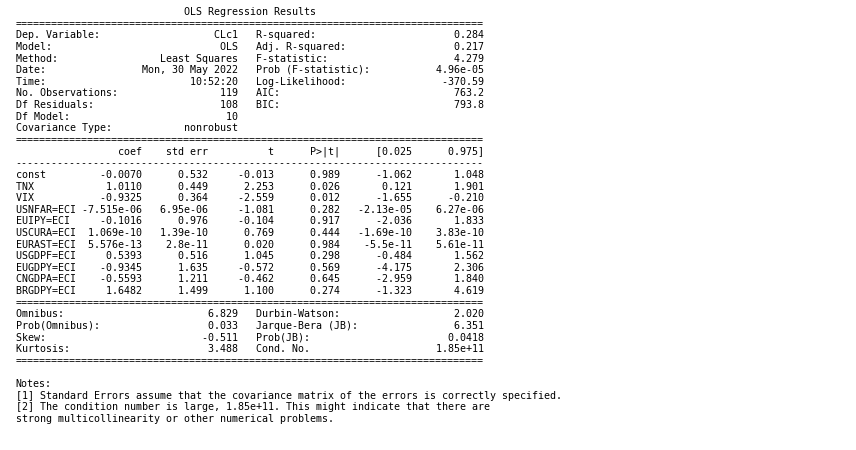

In [63]:
ydataCLc1 = y_data_diff.copy()
xdataCLc1 = x_data_diff.copy()

y=ydataCLc1['CLc1']
x1=xdataCLc1[['TNX', 'VIX']]
x2=xdataCLc1[['TNX', 'VIX', 'USNFAR=ECI']]
x3=xdataCLc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI']]
x4=xdataCLc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI']]
x5=xdataCLc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI']]
x6=xdataCLc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI']]
x7=xdataCLc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI']]
x8=xdataCLc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI']]
x9=xdataCLc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]


x_list = [x1, x2, x3, x4, x5, x6, x7, x8, x9]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())
    
    
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('OLS CLc1.png')

### OLS Loop LCOc1

                            OLS Regression Results                            
Dep. Variable:                  LCOc1   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     22.37
Date:                Mon, 30 May 2022   Prob (F-statistic):           6.09e-09
Time:                        10:53:21   Log-Likelihood:                -370.84
No. Observations:                 119   AIC:                             747.7
Df Residuals:                     116   BIC:                             756.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1981      0.510     -0.388      0.6

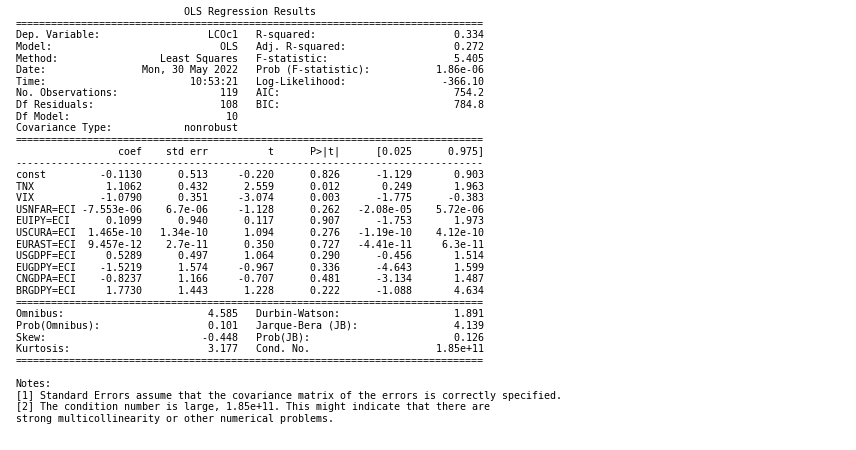

In [65]:
ydataLCOc1 = y_data_diff.copy()
xdataLCOc1 = x_data_diff.copy()

y=ydataLCOc1['LCOc1']
x1=xdataLCOc1[['TNX', 'VIX']]
x2=xdataLCOc1[['TNX', 'VIX', 'USNFAR=ECI']]
x3=xdataLCOc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI']]
x4=xdataLCOc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI']]
x5=xdataLCOc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI']]
x6=xdataLCOc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI']]
x7=xdataLCOc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI']]
x8=xdataLCOc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI']]
x9=xdataLCOc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]


x_list = [x1, x2, x3, x4, x5, x6, x7, x8, x9]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())
    
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('OLS LCOc1.png')

### OLS Loop GCc1

                            OLS Regression Results                            
Dep. Variable:                   GCc1   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     8.737
Date:                Mon, 30 May 2022   Prob (F-statistic):           0.000292
Time:                        10:54:08   Log-Likelihood:                -648.07
No. Observations:                 119   AIC:                             1302.
Df Residuals:                     116   BIC:                             1310.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5630      5.243     -0.107      0.9

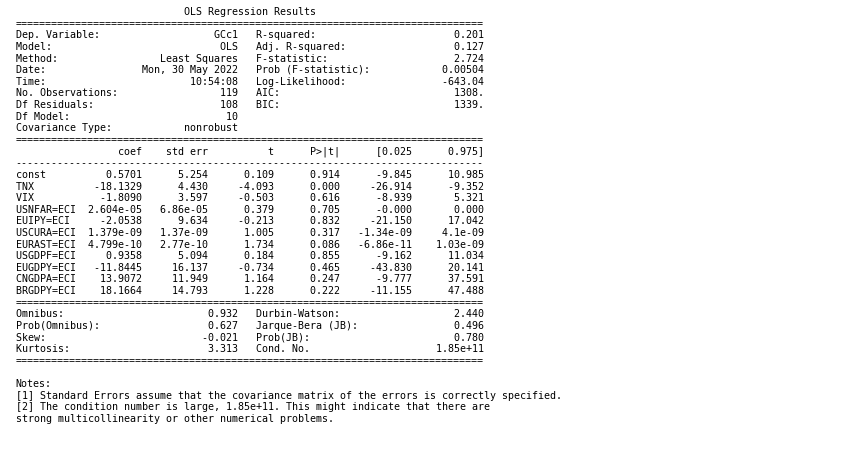

In [66]:
ydataGCc1 = y_data_diff.copy()
xdataGCc1 = x_data_diff.copy()

y=ydataGCc1['GCc1']
x1=xdataGCc1[['TNX', 'VIX']]
x2=xdataGCc1[['TNX', 'VIX', 'USNFAR=ECI']]
x3=xdataGCc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI']]
x4=xdataGCc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI']]
x5=xdataGCc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI']]
x6=xdataGCc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI']]
x7=xdataGCc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI']]
x8=xdataGCc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI']]
x9=xdataGCc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]


x_list = [x1, x2, x3, x4, x5, x6, x7, x8, x9]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('OLS GCc1.png')

### OLS Loop SIc1

                            OLS Regression Results                            
Dep. Variable:                   SIc1   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     5.285
Date:                Mon, 30 May 2022   Prob (F-statistic):            0.00636
Time:                        10:55:09   Log-Likelihood:                -224.50
No. Observations:                 119   AIC:                             455.0
Df Residuals:                     116   BIC:                             463.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1101      0.149     -0.738      0.4

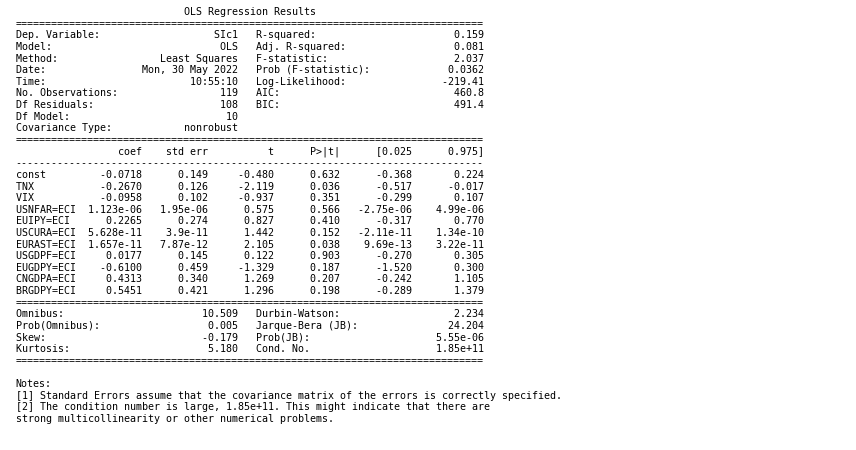

In [67]:
ydataSIc1 = y_data_diff.copy()
xdataSIc1 = x_data_diff.copy()

y=ydataSIc1['SIc1']
x1=xdataSIc1[['TNX', 'VIX']]
x2=xdataSIc1[['TNX', 'VIX', 'USNFAR=ECI']]
x3=xdataSIc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI']]
x4=xdataSIc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI']]
x5=xdataSIc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI']]
x6=xdataSIc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI']]
x7=xdataSIc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI']]
x8=xdataSIc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI']]
x9=xdataSIc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]


x_list = [x1, x2, x3, x4, x5, x6, x7, x8, x9]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('OLS SIc1.png')

### OLS Loop PLc1

                            OLS Regression Results                            
Dep. Variable:                   PLc1   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     5.777
Date:                Mon, 30 May 2022   Prob (F-statistic):            0.00406
Time:                        10:56:04   Log-Likelihood:                -661.36
No. Observations:                 119   AIC:                             1329.
Df Residuals:                     116   BIC:                             1337.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8036      5.861     -0.990      0.3

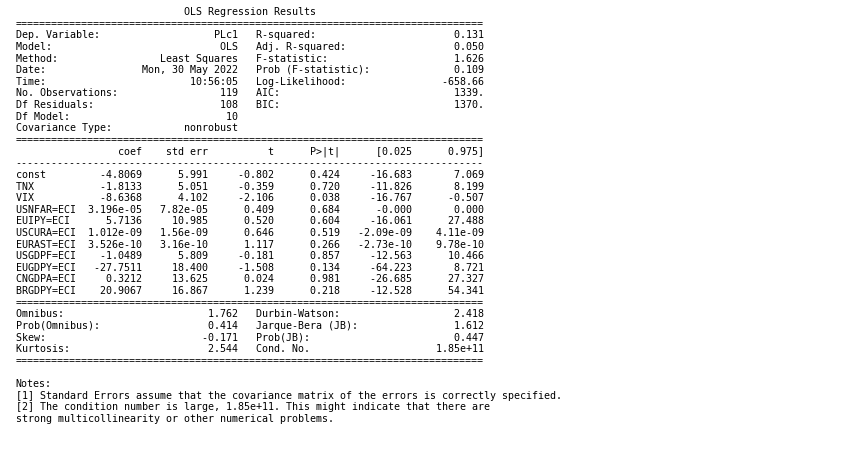

In [68]:
ydataPLc1 = y_data_diff.copy()
xdataPLc1 = x_data_diff.copy()

y=ydataPLc1['PLc1']
x1=xdataPLc1[['TNX', 'VIX']]
x2=xdataPLc1[['TNX', 'VIX', 'USNFAR=ECI']]
x3=xdataPLc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI']]
x4=xdataPLc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI']]
x5=xdataPLc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI']]
x6=xdataPLc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI']]
x7=xdataPLc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI']]
x8=xdataPLc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI']]
x9=xdataPLc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]


x_list = [x1, x2, x3, x4, x5, x6, x7, x8, x9]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())
    
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('OLS PLc1.png')

### OLS Loop NGc1

                            OLS Regression Results                            
Dep. Variable:                   NGc1   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.1683
Date:                Mon, 30 May 2022   Prob (F-statistic):              0.845
Time:                        10:57:03   Log-Likelihood:                -64.149
No. Observations:                 119   AIC:                             134.3
Df Residuals:                     116   BIC:                             142.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0197      0.039      0.508      0.6

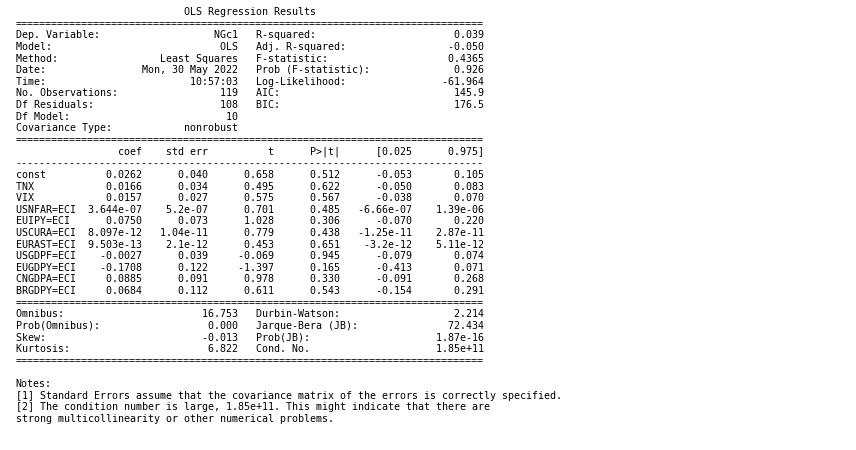

In [70]:
ydataNGc1 = y_data_diff.copy()
xdataNGc1 = x_data_diff.copy()

y=ydataNGc1['NGc1']
x1=xdataNGc1[['TNX', 'VIX']]
x2=xdataNGc1[['TNX', 'VIX', 'USNFAR=ECI']]
x3=xdataNGc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI']]
x4=xdataNGc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI']]
x5=xdataNGc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI']]
x6=xdataNGc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI']]
x7=xdataNGc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI']]
x8=xdataNGc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI']]
x9=xdataNGc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]


x_list = [x1, x2, x3, x4, x5, x6, x7, x8, x9]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('OLS NGc1.png')

### OLS Loop Wc1

                            OLS Regression Results                            
Dep. Variable:                    Wc1   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.019
Date:                Mon, 30 May 2022   Prob (F-statistic):              0.364
Time:                        10:57:41   Log-Likelihood:                -626.26
No. Observations:                 119   AIC:                             1259.
Df Residuals:                     116   BIC:                             1267.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5541      4.364      0.356      0.7

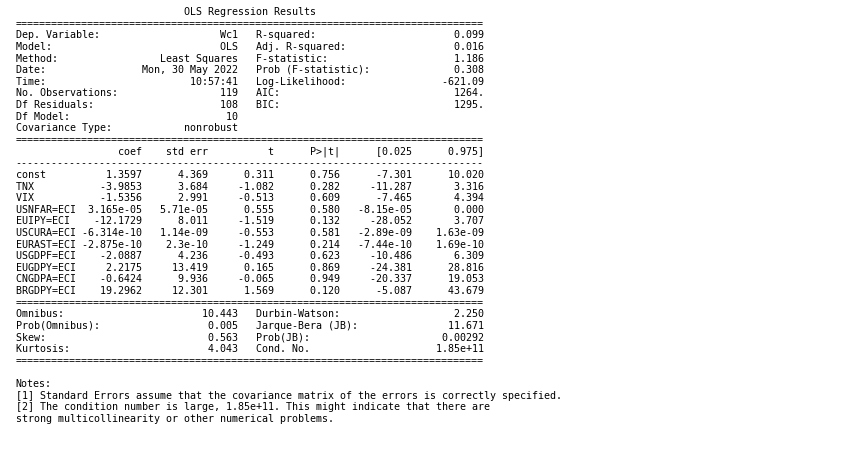

In [71]:
ydataWc1 = y_data_diff.copy()
xdataWc1 = x_data_diff.copy()

y=ydataWc1['Wc1']
x1=xdataWc1[['TNX', 'VIX']]
x2=xdataWc1[['TNX', 'VIX', 'USNFAR=ECI']]
x3=xdataWc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI']]
x4=xdataWc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI']]
x5=xdataWc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI']]
x6=xdataWc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI']]
x7=xdataWc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI']]
x8=xdataWc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI']]
x9=xdataWc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]


x_list = [x1, x2, x3, x4, x5, x6, x7, x8, x9]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())
    
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('OLS Wc1.png')

### OLS Loop Sc1

                            OLS Regression Results                            
Dep. Variable:                    Sc1   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.848
Date:                Mon, 30 May 2022   Prob (F-statistic):              0.162
Time:                        10:58:24   Log-Likelihood:                -683.58
No. Observations:                 119   AIC:                             1373.
Df Residuals:                     116   BIC:                             1382.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7462      7.065      0.106      0.9

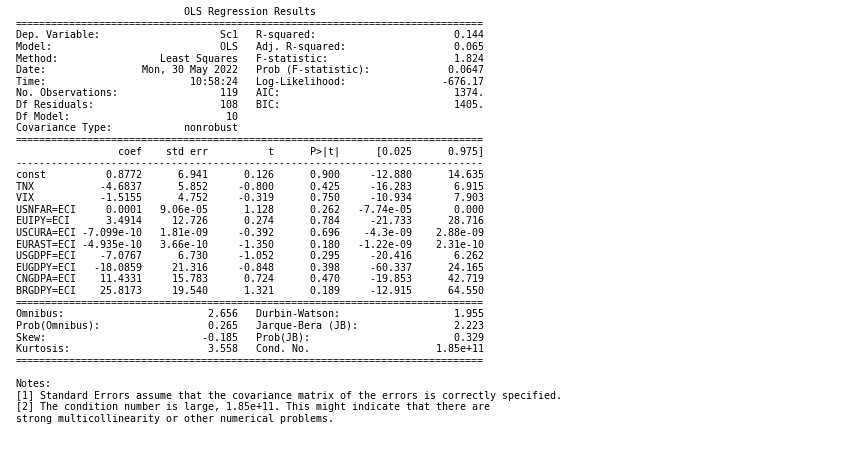

In [72]:
ydataSc1 = y_data_diff.copy()
xdataSc1 = x_data_diff.copy()

y=ydataSc1['Sc1']
x1=xdataSc1[['TNX', 'VIX']]
x2=xdataSc1[['TNX', 'VIX', 'USNFAR=ECI']]
x3=xdataSc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI']]
x4=xdataSc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI']]
x5=xdataSc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI']]
x6=xdataSc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI']]
x7=xdataSc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI']]
x8=xdataSc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI']]
x9=xdataSc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]


x_list = [x1, x2, x3, x4, x5, x6, x7, x8, x9]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())

plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('OLS Sc1.png')

### OLS Loop HOc1

                            OLS Regression Results                            
Dep. Variable:                   HOc1   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     10.72
Date:                Mon, 30 May 2022   Prob (F-statistic):           5.33e-05
Time:                        10:59:01   Log-Likelihood:                 42.022
No. Observations:                 119   AIC:                            -78.04
Df Residuals:                     116   BIC:                            -69.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0019      0.016     -0.117      0.9

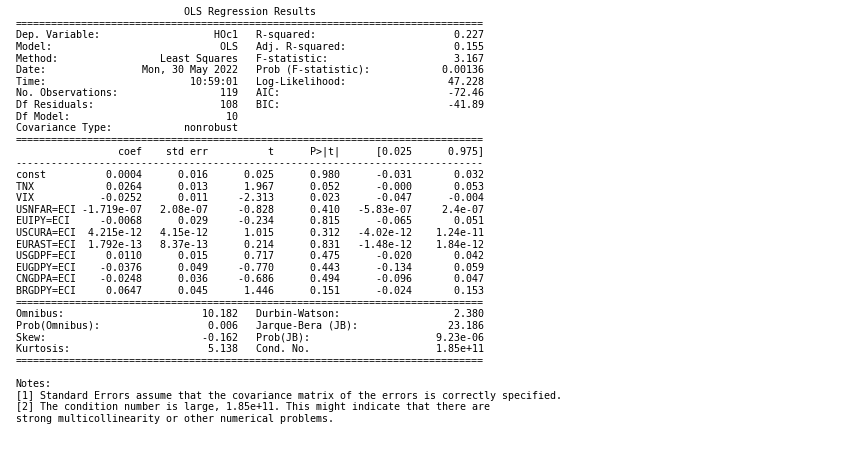

In [73]:
ydataHOc1 = y_data_diff.copy()
xdataHOc1 = x_data_diff.copy()

y=ydataHOc1['HOc1']
x1=xdataHOc1[['TNX', 'VIX']]
x2=xdataHOc1[['TNX', 'VIX', 'USNFAR=ECI']]
x3=xdataHOc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI']]
x4=xdataHOc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI']]
x5=xdataHOc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI']]
x6=xdataHOc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI']]
x7=xdataHOc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI']]
x8=xdataHOc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI']]
x9=xdataHOc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]


x_list = [x1, x2, x3, x4, x5, x6, x7, x8, x9]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())
    
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('OLS HOc1.png')

### OLS Loop Cc1

                            OLS Regression Results                            
Dep. Variable:                    Cc1   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.461
Date:                Mon, 30 May 2022   Prob (F-statistic):              0.236
Time:                        10:59:48   Log-Likelihood:                -617.02
No. Observations:                 119   AIC:                             1240.
Df Residuals:                     116   BIC:                             1248.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1839      4.038     -0.046      0.9

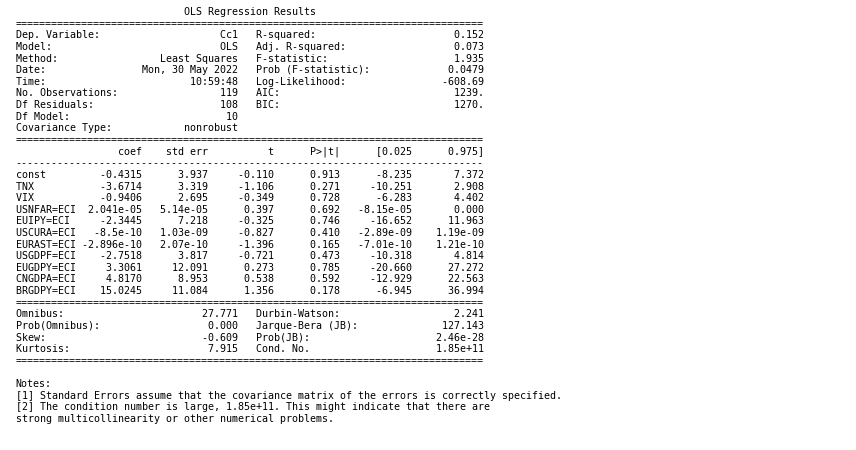

In [74]:
ydataCc1 = y_data_diff.copy()
xdataCc1 = x_data_diff.copy()

y=ydataCc1['Cc1']
x1=xdataCc1[['TNX', 'VIX']]
x2=xdataCc1[['TNX', 'VIX', 'USNFAR=ECI']]
x3=xdataCc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI']]
x4=xdataCc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI']]
x5=xdataCc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI']]
x6=xdataCc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI']]
x7=xdataCc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI']]
x8=xdataCc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI']]
x9=xdataCc1[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]


x_list = [x1, x2, x3, x4, x5, x6, x7, x8, x9]


for i in range(len(x_list)):

    Y = y
    X = x_list[i]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())
    
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('OLS Cc1.png')

# For each regression, test for autocorrelation, heteroskedasticity and multicollinearity

## Multicollinearity

In [75]:
df=pd.read_excel(r'C:\Users\Philné\Desktop\ZHAW\Semester 2\Advanced Quantitative Methods\Projects\AQM\Databases\WORKING\AQM_Dataset - 1st Diff.xlsx').drop('Date',axis=1)

In [76]:
df

,CLc1,LCOc1,GCc1,SIc1,PLc1,NGc1,Wc1,Sc1,HOc1,Cc1,TNX,VIX,USNFAR=ECI,EUIPY=ECI,USCURA=ECI,EURAST=ECI,USGDPF=ECI,EUGDPY=ECI,CNGDPA=ECI,BRGDPY=ECI
0,1.85,-3.41,-5.9,-1.510,-70.6,0.159,-13.00,100.00,0.0150,16.25,-1.856667,0.526667,-66777.777778,-0.144444,1.300000e+09,1.009000e+10,-0.200000,-0.100000,0.066667,-0.233333
1,-18.34,-17.60,-100.8,-3.218,-151.6,0.137,-4.00,-163.00,-0.4772,-105.00,-1.856667,0.526667,-66777.777778,-0.144444,1.300000e+09,1.009000e+10,-0.200000,-0.100000,0.066667,-0.233333
2,-1.57,-4.07,40.9,-0.161,33.0,0.402,95.25,172.75,-0.0102,117.25,-1.856667,0.526667,-66777.777778,-0.144444,1.300000e+09,1.009000e+10,-0.200000,-0.100000,0.066667,-0.233333
3,3.10,7.12,7.0,0.315,-33.7,0.385,149.25,208.25,0.1457,134.00,-0.073333,-0.450000,28444.444444,0.055556,3.733333e+09,1.077000e+10,0.600000,-0.066667,-0.066667,0.500000
4,8.41,9.65,74.1,3.475,120.9,-0.410,-18.25,43.50,0.3279,-3.75,-0.073333,-0.450000,28444.444444,0.055556,3.733333e+09,1.077000e+10,0.600000,-0.066667,-0.066667,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,8.54,5.86,27.7,1.924,58.7,-0.441,47.25,-20.25,0.1547,31.50,-0.056667,-1.973333,31333.333333,-1.933333,6.666667e+08,1.821333e+10,1.533333,0.233333,0.300000,-0.800000
115,-17.39,-13.81,-9.4,-1.180,-93.0,-0.859,1.00,-18.50,-0.4326,-1.25,-0.056667,-1.973333,31333.333333,-1.933333,6.666667e+08,1.821333e+10,1.533333,0.233333,0.300000,-0.800000
116,9.03,7.21,53.9,0.563,37.8,-0.837,-3.00,111.50,0.2663,26.25,-0.056667,-1.973333,31333.333333,-1.933333,6.666667e+08,1.821333e+10,1.533333,0.233333,0.300000,-0.800000
117,12.94,13.43,-32.5,-0.933,54.8,1.144,-9.50,161.75,0.4291,32.75,-5.040000,-5.740000,-212444.444444,-0.066667,7.263333e+10,-3.523467e+11,-2.300000,-1.533333,-0.533333,-0.533333


In [81]:
corr = df[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']].corr()
dfi.export(corr, 'Correlation.png')

In [80]:
corr

,TNX,VIX,USNFAR=ECI,EUIPY=ECI,USCURA=ECI,EURAST=ECI,USGDPF=ECI,EUGDPY=ECI,CNGDPA=ECI,BRGDPY=ECI
TNX,1.000000,-0.222663,0.091550,0.081426,-0.372633,0.292120,0.076214,0.129919,0.167397,0.064298
VIX,-0.222663,1.000000,0.165696,-0.081496,-0.225335,0.269883,0.026766,-0.024046,-0.619631,0.062373
USNFAR=ECI,0.091550,0.165696,1.000000,0.490068,-0.022472,0.048141,0.927716,0.599073,-0.699083,0.540745
EUIPY=ECI,0.081426,-0.081496,0.490068,1.000000,0.085459,-0.116032,0.426015,0.928455,-0.402760,0.902325
USCURA=ECI,-0.372633,-0.225335,-0.022472,0.085459,1.000000,-0.901806,-0.050624,-0.057096,-0.152980,0.033148
EURAST=ECI,0.292120,0.269883,0.048141,-0.116032,-0.901806,1.000000,0.056631,0.059973,0.063544,-0.036200
USGDPF=ECI,0.076214,0.026766,0.927716,0.426015,-0.050624,0.056631,1.000000,0.564447,-0.487232,0.424354
EUGDPY=ECI,0.129919,-0.024046,0.599073,0.928455,-0.057096,0.059973,0.564447,1.000000,-0.419842,0.910510
CNGDPA=ECI,0.167397,-0.619631,-0.699083,-0.402760,-0.152980,0.063544,-0.487232,-0.419842,1.000000,-0.499407
BRGDPY=ECI,0.064298,0.062373,0.540745,0.902325,0.033148,-0.036200,0.424354,0.910510,-0.499407,1.000000


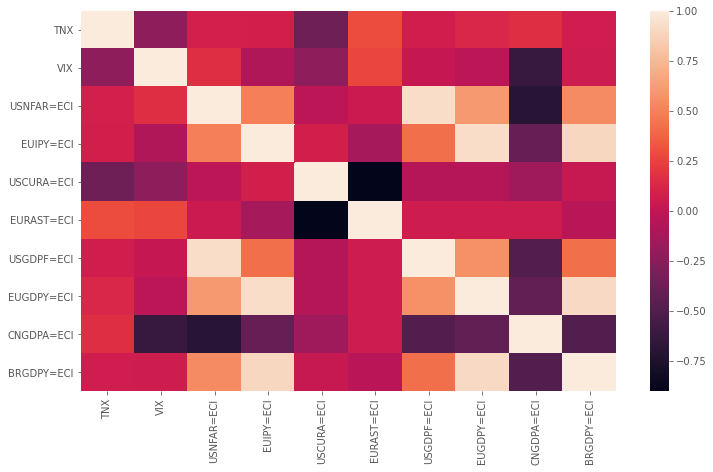

In [82]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

results_path = 'results.png'
plt.savefig(results_path, dpi=400)

In [83]:
def vif_cal(input_data, dependent_col):
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(formula="y~x", data=x_vars,endog=y, exog=x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [84]:
vif_cal(input_data=df[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']], dependent_col='CLc1')

TNX  VIF =  1.44
VIX  VIF =  4.21
USNFAR=ECI  VIF =  25.98
EUIPY=ECI  VIF =  12.2
USCURA=ECI  VIF =  7.34
EURAST=ECI  VIF =  6.48
USGDPF=ECI  VIF =  16.34
EUGDPY=ECI  VIF =  17.47
CNGDPA=ECI  VIF =  10.26
BRGDPY=ECI  VIF =  9.52


In [85]:
#if VIF factor > 5, omit variable, thus omit: USNFAR=ECI, EUIPY=ECI, USCURA=ECI, EURAST=ECI, USGDPF=ECI, EUGDPY=ECI, CNGDPA=ECI, BRGDPY=ECI

## Heteroskedasticity and Autocorrelation

In [87]:
df=pd.read_excel(r'C:\Users\Philné\Desktop\ZHAW\Semester 2\Advanced Quantitative Methods\Projects\AQM\Databases\WORKING\AQM_Dataset - 1st Diff.xlsx').drop('Date',axis=1)

In [88]:
df

,CLc1,LCOc1,GCc1,SIc1,PLc1,NGc1,Wc1,Sc1,HOc1,Cc1,TNX,VIX,USNFAR=ECI,EUIPY=ECI,USCURA=ECI,EURAST=ECI,USGDPF=ECI,EUGDPY=ECI,CNGDPA=ECI,BRGDPY=ECI
0,1.85,-3.41,-5.9,-1.510,-70.6,0.159,-13.00,100.00,0.0150,16.25,-1.856667,0.526667,-66777.777778,-0.144444,1.300000e+09,1.009000e+10,-0.200000,-0.100000,0.066667,-0.233333
1,-18.34,-17.60,-100.8,-3.218,-151.6,0.137,-4.00,-163.00,-0.4772,-105.00,-1.856667,0.526667,-66777.777778,-0.144444,1.300000e+09,1.009000e+10,-0.200000,-0.100000,0.066667,-0.233333
2,-1.57,-4.07,40.9,-0.161,33.0,0.402,95.25,172.75,-0.0102,117.25,-1.856667,0.526667,-66777.777778,-0.144444,1.300000e+09,1.009000e+10,-0.200000,-0.100000,0.066667,-0.233333
3,3.10,7.12,7.0,0.315,-33.7,0.385,149.25,208.25,0.1457,134.00,-0.073333,-0.450000,28444.444444,0.055556,3.733333e+09,1.077000e+10,0.600000,-0.066667,-0.066667,0.500000
4,8.41,9.65,74.1,3.475,120.9,-0.410,-18.25,43.50,0.3279,-3.75,-0.073333,-0.450000,28444.444444,0.055556,3.733333e+09,1.077000e+10,0.600000,-0.066667,-0.066667,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,8.54,5.86,27.7,1.924,58.7,-0.441,47.25,-20.25,0.1547,31.50,-0.056667,-1.973333,31333.333333,-1.933333,6.666667e+08,1.821333e+10,1.533333,0.233333,0.300000,-0.800000
115,-17.39,-13.81,-9.4,-1.180,-93.0,-0.859,1.00,-18.50,-0.4326,-1.25,-0.056667,-1.973333,31333.333333,-1.933333,6.666667e+08,1.821333e+10,1.533333,0.233333,0.300000,-0.800000
116,9.03,7.21,53.9,0.563,37.8,-0.837,-3.00,111.50,0.2663,26.25,-0.056667,-1.973333,31333.333333,-1.933333,6.666667e+08,1.821333e+10,1.533333,0.233333,0.300000,-0.800000
117,12.94,13.43,-32.5,-0.933,54.8,1.144,-9.50,161.75,0.4291,32.75,-5.040000,-5.740000,-212444.444444,-0.066667,7.263333e+10,-3.523467e+11,-2.300000,-1.533333,-0.533333,-0.533333


### 1. CLc1

In [186]:
Y.CLc1=df['CLc1']
X=df[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]
X=sm.add_constant(X)

model = sm.OLS(Y.CLc1,X)
results1 = model.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CLc1   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     4.279
Date:                Mon, 30 May 2022   Prob (F-statistic):           4.96e-05
Time:                        12:00:05   Log-Likelihood:                -370.59
No. Observations:                 119   AIC:                             763.2
Df Residuals:                     108   BIC:                             793.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0070      0.532     -0.013      0.989      -1.062       1.048
TNX            1.0110      0.449      2.253      0.026       0.121       1.901
VIX           -0.9325      0.364     -2.559      0.012      -1.655      -0.210
USNFAR=ECI -7.515e-06   6.95e-06     -1.081      0.282   -2.13e-05    6.27e-06
EUIPY=ECI     -0.1016      0.976     -0.104      0.917      -2.036       1.833
USCURA=ECI  1.069e-10   1.39e-10      0.769      0.444   -1.69e-10    3.83e-10
EURAST=ECI  5.575e-13    2.8e-11      0.020      0.984    -5.5e-11    5.61e-11
USGDPF=ECI     0.5393      0.516      1.045      0.298      -0.484       1.562
EUGDPY=ECI    -0.9345      1.635     -0.572      0.569      -4.175       2.306
CNGDPA=ECI    -0.5593      1.211     -0.462      0.645      -2.959       1.840
BRGDPY=ECI     1.6482      1.499      1.100      0.274      -1.323       4.619
==============================================================================
Omnibus:                        6.829   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.351
Skew:                          -0.511   Prob(JB):                       0.0418
Kurtosis:                       3.488   Cond. No.                     1.85e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
regression1 = pd.DataFrame(Y.CLc1)

prediction1 = results1.predict()

regression1['Prediction']=prediction1
regression1.head()

,CLc1,Prediction
0,1.85,-2.150479
1,-18.34,-2.150479
2,-1.57,-2.150479
3,3.10,1.771438
4,8.41,1.771438


<function matplotlib.pyplot.show(close=None, block=None)>

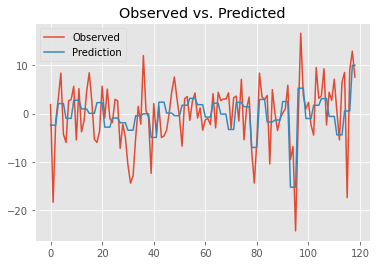

In [129]:
plt.plot(regression1)
labels=['Observed','Prediction']
plt.legend(labels)
plt.title('Observed vs. Predicted')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

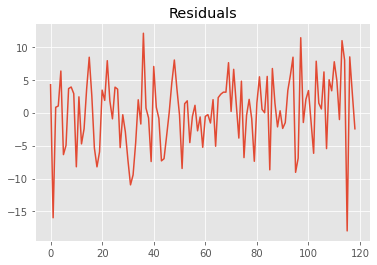

In [116]:
residuals1 = Y.CLc1 - prediction1
plt.plot(residuals1)
plt.title('Residuals')
plt.show

In [117]:
residuals1 = Y.CLc1 - prediction1
xs_with_constant = sm.add_constant(X)

name = ['Jarque-Bera', 'JB P-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(residuals1)
lzip(name, test)

[('Jarque-Bera', 4.682398886451963),
 ('JB P-value', 0.0962121679612024),
 ('Skew', -0.4497821004325754),
 ('Kurtosis', 3.367605228162847)]

In [118]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test = sms.het_breuschpagan(residuals1, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 16.85940299053616),
 ('p-value', 0.07753350336280779),
 ('f-value', 1.7826560410736565),
 ('f p-value', 0.07223709831113216)]

In [119]:
dw_pvalue1=sm.stats.stattools.durbin_watson(residuals1)
print("\n","Durbin Watson Test Statistics", dw_pvalue1)


 Durbin Watson Test Statistics 2.0162229409352785


### 2. LCOc1

In [190]:
Y.LCOc1=df['LCOc1']
X=df[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]
X=sm.add_constant(X)

model = sm.OLS(Y.LCOc1,X)
results2 = model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LCOc1   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     5.405
Date:                Mon, 30 May 2022   Prob (F-statistic):           1.86e-06
Time:                        12:01:11   Log-Likelihood:                -366.10
No. Observations:                 119   AIC:                             754.2
Df Residuals:                     108   BIC:                             784.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1130      0.513     -0.220      0.826      -1.129       0.903
TNX            1.1061      0.432      2.559      0.012       0.249       1.963
VIX           -1.0790      0.351     -3.074      0.003      -1.775      -0.383
USNFAR=ECI -7.553e-06    6.7e-06     -1.128      0.262   -2.08e-05    5.72e-06
EUIPY=ECI      0.1099      0.940      0.117      0.907      -1.753       1.973
USCURA=ECI  1.465e-10   1.34e-10      1.094      0.276   -1.19e-10    4.12e-10
EURAST=ECI  9.457e-12    2.7e-11      0.350      0.727   -4.41e-11     6.3e-11
USGDPF=ECI     0.5289      0.497      1.064      0.290      -0.456       1.514
EUGDPY=ECI    -1.5219      1.574     -0.967      0.336      -4.643       1.599
CNGDPA=ECI    -0.8237      1.166     -0.707      0.481      -3.134       1.487
BRGDPY=ECI     1.7730      1.443      1.228      0.222      -1.088       4.634
==============================================================================
Omnibus:                        4.585   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.139
Skew:                          -0.448   Prob(JB):                        0.126
Kurtosis:                       3.177   Cond. No.                     1.85e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
regression2 = pd.DataFrame(Y.LCOc1)

prediction2 = results2.predict()

regression2['Prediction']=prediction2
regression2.head()

,LCOc1,Prediction
0,-3.41,-2.382860
1,-17.60,-2.382860
2,-4.07,-2.382860
3,7.12,2.091724
4,9.65,2.091724


<function matplotlib.pyplot.show(close=None, block=None)>

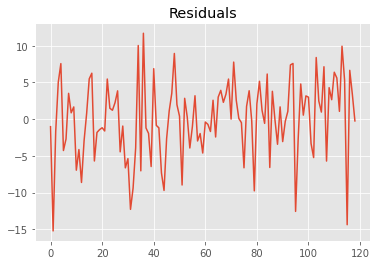

In [130]:
residuals2 = Y.LCOc1 - prediction2
plt.plot(residuals2)
plt.title('Residuals')
plt.show

In [131]:
residuals2 = Y.LCOc1 - prediction2
xs_with_constant = sm.add_constant(X)

name = ['Jarque-Bera', 'JB P-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(residuals2)
lzip(name, test)

[('Jarque-Bera', 4.138685720968541),
 ('JB P-value', 0.12626873062004026),
 ('Skew', -0.4481232181931856),
 ('Kurtosis', 3.177299869654193)]

In [132]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test = sms.het_breuschpagan(residuals2, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 16.453485852637062),
 ('p-value', 0.08736597520151188),
 ('f-value', 1.7328492215066675),
 ('f p-value', 0.08238689372601916)]

In [133]:
dw_pvalue2=sm.stats.stattools.durbin_watson(residuals2)
print("\n","Durbin Watson Test Statistics", dw_pvalue2)


 Durbin Watson Test Statistics 1.891186808522315


### 3. GCc1

In [192]:
Y.GCc1=df['GCc1']
X=df[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]
X=sm.add_constant(X)

model = sm.OLS(Y.GCc1,X)
results3 = model.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GCc1   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     2.724
Date:                Mon, 30 May 2022   Prob (F-statistic):            0.00504
Time:                        12:01:48   Log-Likelihood:                -643.04
No. Observations:                 119   AIC:                             1308.
Df Residuals:                     108   BIC:                             1339.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5701      5.254      0.109      0.914      -9.845      10.985
TNX          -18.1328      4.430     -4.093      0.000     -26.914      -9.352
VIX           -1.8090      3.597     -0.503      0.616      -8.939       5.321
USNFAR=ECI  2.604e-05   6.86e-05      0.379      0.705      -0.000       0.000
EUIPY=ECI     -2.0538      9.634     -0.213      0.832     -21.150      17.042
USCURA=ECI  1.379e-09   1.37e-09      1.005      0.317   -1.34e-09     4.1e-09
EURAST=ECI  4.799e-10   2.77e-10      1.734      0.086   -6.86e-11    1.03e-09
USGDPF=ECI     0.9358      5.094      0.184      0.855      -9.162      11.034
EUGDPY=ECI   -11.8445     16.137     -0.734      0.465     -43.830      20.141
CNGDPA=ECI    13.9072     11.949      1.164      0.247      -9.777      37.591
BRGDPY=ECI    18.1664     14.793      1.228      0.222     -11.155      47.488
==============================================================================
Omnibus:                        0.932   Durbin-Watson:                   2.440
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                0.496
Skew:                          -0.021   Prob(JB):                        0.780
Kurtosis:                       3.313   Cond. No.                     1.85e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [193]:
regression3 = pd.DataFrame(Y.GCc1)

prediction3 = results3.predict()

regression3['Prediction']=prediction3
regression3.head()

,GCc1,Prediction
0,-5.9,36.162881
1,-100.8,36.162881
2,40.9,36.162881
3,7.0,23.164545
4,74.1,23.164545


<function matplotlib.pyplot.show(close=None, block=None)>

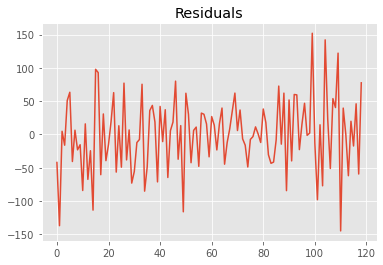

In [136]:
residuals3 = Y.GCc1 - prediction3
plt.plot(residuals3)
plt.title('Residuals')
plt.show

In [137]:
residuals3 = Y.GCc1 - prediction3
xs_with_constant = sm.add_constant(X)

name = ['Jarque-Bera', 'JB P-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(residuals3)
lzip(name, test)

[('Jarque-Bera', 0.496111243884944),
 ('JB P-value', 0.7803165393492785),
 ('Skew', -0.021270488147171553),
 ('Kurtosis', 3.3134426813993327)]

In [138]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test = sms.het_breuschpagan(residuals3, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 24.982653293439625),
 ('p-value', 0.0053784828574425965),
 ('f-value', 2.8698178051255403),
 ('f p-value', 0.003278809750853365)]

In [139]:
dw_pvalue3=sm.stats.stattools.durbin_watson(residuals3)
print("\n","Durbin Watson Test Statistics", dw_pvalue3)


 Durbin Watson Test Statistics 2.439558608573899


### 4. SIc1

In [194]:
Y.SIc1=df['SIc1']
X=df[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]
X=sm.add_constant(X)

model = sm.OLS(Y.SIc1,X)
results4 = model.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SIc1   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     2.037
Date:                Mon, 30 May 2022   Prob (F-statistic):             0.0362
Time:                        12:02:24   Log-Likelihood:                -219.41
No. Observations:                 119   AIC:                             460.8
Df Residuals:                     108   BIC:                             491.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0718      0.149     -0.480      0.632      -0.368       0.224
TNX           -0.2670      0.126     -2.119      0.036      -0.517      -0.017
VIX           -0.0958      0.102     -0.937      0.351      -0.299       0.107
USNFAR=ECI  1.123e-06   1.95e-06      0.575      0.566   -2.75e-06    4.99e-06
EUIPY=ECI      0.2265      0.274      0.827      0.410      -0.317       0.770
USCURA=ECI  5.628e-11    3.9e-11      1.442      0.152   -2.11e-11    1.34e-10
EURAST=ECI  1.657e-11   7.87e-12      2.105      0.038    9.69e-13    3.22e-11
USGDPF=ECI     0.0177      0.145      0.122      0.903      -0.270       0.305
EUGDPY=ECI    -0.6100      0.459     -1.329      0.187      -1.520       0.300
CNGDPA=ECI     0.4313      0.340      1.269      0.207      -0.242       1.105
BRGDPY=ECI     0.5451      0.421      1.296      0.198      -0.289       1.379
==============================================================================
Omnibus:                       10.509   Durbin-Watson:                   2.234
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               24.204
Skew:                          -0.179   Prob(JB):                     5.55e-06
Kurtosis:                       5.180   Cond. No.                     1.85e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [195]:
regression4 = pd.DataFrame(Y.SIc1)

prediction4 = results4.predict()

regression4['Prediction']=prediction4
regression4.head()

,SIc1,Prediction
0,-1.510,0.465180
1,-3.218,0.465180
2,-0.161,0.465180
3,0.315,0.719065
4,3.475,0.719065


<function matplotlib.pyplot.show(close=None, block=None)>

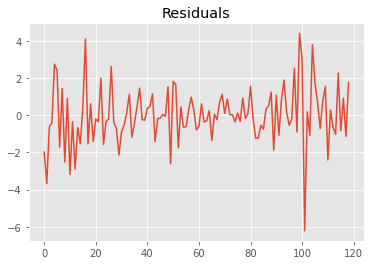

In [179]:
residuals4 = Y.SIc1 - prediction4
plt.plot(residuals4)
plt.title('Residuals')
plt.show

In [180]:
residuals4 = Y.SIc1 - prediction4
xs_with_constant = sm.add_constant(X)

name = ['Jarque-Bera', 'JB P-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(residuals4)
lzip(name, test)

[('Jarque-Bera', 24.20444179202332),
 ('JB P-value', 5.547179841533968e-06),
 ('Skew', -0.1792301513073517),
 ('Kurtosis', 5.180154651385603)]

In [181]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test = sms.het_breuschpagan(residuals4, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 46.55087177701303),
 ('p-value', 1.1395004247909436e-06),
 ('f-value', 6.93934388891965),
 ('f p-value', 2.569569443639511e-08)]

In [182]:
dw_pvalue4=sm.stats.stattools.durbin_watson(residuals4)
print("\n","Durbin Watson Test Statistics", dw_pvalue4)


 Durbin Watson Test Statistics 2.233577415790179


### 5. PLc1

In [196]:
Y.PLc1=df['PLc1']
X=df[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]
X=sm.add_constant(X)

model = sm.OLS(Y.PLc1,X)
results5 = model.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PLc1   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.626
Date:                Mon, 30 May 2022   Prob (F-statistic):              0.109
Time:                        12:02:50   Log-Likelihood:                -658.66
No. Observations:                 119   AIC:                             1339.
Df Residuals:                     108   BIC:                             1370.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8069      5.991     -0.802      0.424     -16.683       7.069
TNX           -1.8133      5.051     -0.359      0.720     -11.826       8.199
VIX           -8.6368      4.102     -2.106      0.038     -16.767      -0.507
USNFAR=ECI  3.196e-05   7.82e-05      0.409      0.684      -0.000       0.000
EUIPY=ECI      5.7136     10.985      0.520      0.604     -16.061      27.488
USCURA=ECI  1.012e-09   1.56e-09      0.646      0.519   -2.09e-09    4.11e-09
EURAST=ECI  3.526e-10   3.16e-10      1.117      0.266   -2.73e-10    9.78e-10
USGDPF=ECI    -1.0489      5.809     -0.181      0.857     -12.563      10.466
EUGDPY=ECI   -27.7511     18.400     -1.508      0.134     -64.223       8.721
CNGDPA=ECI     0.3212     13.625      0.024      0.981     -26.685      27.327
BRGDPY=ECI    20.9067     16.867      1.239      0.218     -12.528      54.341
==============================================================================
Omnibus:                        1.762   Durbin-Watson:                   2.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                1.612
Skew:                          -0.171   Prob(JB):                        0.447
Kurtosis:                       2.544   Cond. No.                     1.85e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
regression5 = pd.DataFrame(Y.PLc1)

prediction5 = results5.predict()

regression5['Prediction']=prediction5
regression5.head()

,PLc1,Prediction
0,-70.6,-5.948211
1,-151.6,-5.948211
2,33.0,-5.948211
3,-33.7,19.665755
4,120.9,19.665755


<function matplotlib.pyplot.show(close=None, block=None)>

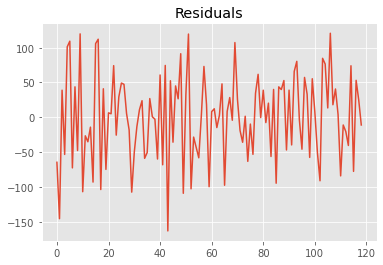

In [173]:
residuals5 = Y.PLc1 - prediction5
plt.plot(residuals5)
plt.title('Residuals')
plt.show

In [174]:
residuals5 = Y.PLc1 - prediction5
xs_with_constant = sm.add_constant(X)

name = ['Jarque-Bera', 'JB P-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(residuals5)
lzip(name, test)

[('Jarque-Bera', 1.611757832173528),
 ('JB P-value', 0.4466951464241802),
 ('Skew', -0.1709293349724253),
 ('Kurtosis', 2.543718230792669)]

In [175]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test = sms.het_breuschpagan(residuals5, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 9.580622101986814),
 ('p-value', 0.47802384171932544),
 ('f-value', 0.9456343171490131),
 ('f p-value', 0.49503160965164206)]

In [176]:
dw_pvalue5=sm.stats.stattools.durbin_watson(residuals5)
print("\n","Durbin Watson Test Statistics", dw_pvalue5)


 Durbin Watson Test Statistics 2.418131258461785


### 6. NGc1 

In [198]:
Y.NGc1=df['NGc1']
X=df[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]
X=sm.add_constant(X)

model = sm.OLS(Y.NGc1,X)
results6 = model.fit()
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   NGc1   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                 -0.050
Method:                 Least Squares   F-statistic:                    0.4365
Date:                Mon, 30 May 2022   Prob (F-statistic):              0.926
Time:                        12:03:24   Log-Likelihood:                -61.964
No. Observations:                 119   AIC:                             145.9
Df Residuals:                     108   BIC:                             176.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0262      0.040      0.658      0.512      -0.053       0.105
TNX            0.0166      0.034      0.495      0.622      -0.050       0.083
VIX            0.0157      0.027      0.575      0.567      -0.038       0.070
USNFAR=ECI  3.644e-07    5.2e-07      0.701      0.485   -6.66e-07    1.39e-06
EUIPY=ECI      0.0750      0.073      1.028      0.306      -0.070       0.220
USCURA=ECI  8.097e-12   1.04e-11      0.779      0.438   -1.25e-11    2.87e-11
EURAST=ECI  9.503e-13    2.1e-12      0.453      0.651    -3.2e-12    5.11e-12
USGDPF=ECI    -0.0027      0.039     -0.069      0.945      -0.079       0.074
EUGDPY=ECI    -0.1708      0.122     -1.397      0.165      -0.413       0.071
CNGDPA=ECI     0.0885      0.091      0.978      0.330      -0.091       0.268
BRGDPY=ECI     0.0684      0.112      0.611      0.543      -0.154       0.291
==============================================================================
Omnibus:                       16.753   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.434
Skew:                          -0.013   Prob(JB):                     1.87e-16
Kurtosis:                       6.822   Cond. No.                     1.85e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [199]:
regression6 = pd.DataFrame(Y.NGc1)

prediction6 = results6.predict()

regression6['Prediction']=prediction6
regression6.head()

,NGc1,Prediction
0,0.159,-0.003929
1,0.137,-0.003929
2,0.402,-0.003929
3,0.385,0.111004
4,-0.410,0.111004


<function matplotlib.pyplot.show(close=None, block=None)>

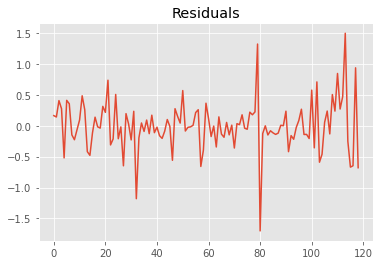

In [167]:
residuals6 = Y.NGc1 - prediction6
plt.plot(residuals6)
plt.title('Residuals')
plt.show

In [168]:
residuals6 = Y.NGc1 - prediction6
xs_with_constant = sm.add_constant(X)

name = ['Jarque-Bera', 'JB P-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(residuals6)
lzip(name, test)

[('Jarque-Bera', 72.43417566039113),
 ('JB P-value', 1.8668894640825376e-16),
 ('Skew', -0.01274638269421153),
 ('Kurtosis', 6.822031313496094)]

In [169]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test = sms.het_breuschpagan(residuals6, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 27.780474010013567),
 ('p-value', 0.001957216769113614),
 ('f-value', 3.2890887784385345),
 ('f p-value', 0.0009437032306514246)]

In [170]:
dw_pvalue6=sm.stats.stattools.durbin_watson(residuals6)
print("\n","Durbin Watson Test Statistics", dw_pvalue6)


 Durbin Watson Test Statistics 2.2138674497589217


### 7. Wc1 

In [200]:
Y.Wc1=df['Wc1']
X=df[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]
X=sm.add_constant(X)

model = sm.OLS(Y.Wc1,X)
results7 = model.fit()
results7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Wc1   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.186
Date:                Mon, 30 May 2022   Prob (F-statistic):              0.308
Time:                        12:04:03   Log-Likelihood:                -621.09
No. Observations:                 119   AIC:                             1264.
Df Residuals:                     108   BIC:                             1295.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3597      4.369      0.311      0.756      -7.301      10.020
TNX           -3.9853      3.684     -1.082      0.282     -11.287       3.316
VIX           -1.5356      2.991     -0.513      0.609      -7.465       4.394
USNFAR=ECI  3.165e-05   5.71e-05      0.555      0.580   -8.15e-05       0.000
EUIPY=ECI    -12.1729      8.011     -1.519      0.132     -28.052       3.707
USCURA=ECI -6.313e-10   1.14e-09     -0.553      0.581   -2.89e-09    1.63e-09
EURAST=ECI -2.875e-10    2.3e-10     -1.249      0.214   -7.44e-10    1.69e-10
USGDPF=ECI    -2.0887      4.236     -0.493      0.623     -10.486       6.309
EUGDPY=ECI     2.2175     13.419      0.165      0.869     -24.381      28.816
CNGDPA=ECI    -0.6424      9.936     -0.065      0.949     -20.337      19.053
BRGDPY=ECI    19.2962     12.301      1.569      0.120      -5.087      43.679
==============================================================================
Omnibus:                       10.443   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.671
Skew:                           0.563   Prob(JB):                      0.00292
Kurtosis:                       4.043   Cond. No.                     1.85e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [201]:
regression7 = pd.DataFrame(Y.Wc1)

prediction7 = results7.predict()

regression7['Prediction']=prediction7
regression7.head()

,Wc1,Prediction
0,-13.00,-0.476310
1,-4.00,-0.476310
2,95.25,-0.476310
3,149.25,5.403156
4,-18.25,5.403156


<function matplotlib.pyplot.show(close=None, block=None)>

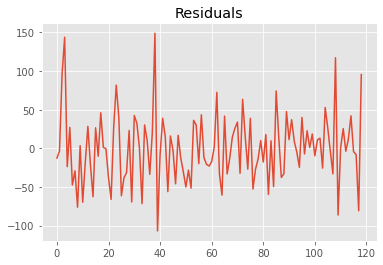

In [161]:
residuals7 = Y.Wc1 - prediction7
plt.plot(residuals7)
plt.title('Residuals')
plt.show

In [162]:
residuals7 = Y.Wc1 - prediction7
xs_with_constant = sm.add_constant(X)

name = ['Jarque-Bera', 'JB P-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(residuals7)
lzip(name, test)

[('Jarque-Bera', 11.671364404424935),
 ('JB P-value', 0.002921429574460847),
 ('Skew', 0.5627297794762807),
 ('Kurtosis', 4.042702930149391)]

In [163]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test = sms.het_breuschpagan(residuals7, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 13.403755877807932),
 ('p-value', 0.20196501307008266),
 ('f-value', 1.3708874277082632),
 ('f p-value', 0.20345165179179078)]

In [164]:
dw_pvalue7=sm.stats.stattools.durbin_watson(residuals7)
print("\n","Durbin Watson Test Statistics", dw_pvalue7)


 Durbin Watson Test Statistics 2.2503846259349594


### 8. Sc1

In [202]:
Y.Sc1=df['Sc1']
X=df[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]
X=sm.add_constant(X)

model = sm.OLS(Y.Sc1,X)
results8 = model.fit()
results8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sc1   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.824
Date:                Mon, 30 May 2022   Prob (F-statistic):             0.0647
Time:                        12:04:33   Log-Likelihood:                -676.17
No. Observations:                 119   AIC:                             1374.
Df Residuals:                     108   BIC:                             1405.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8772      6.941      0.126      0.900     -12.880      14.635
TNX           -4.6836      5.852     -0.800      0.425     -16.283       6.915
VIX           -1.5155      4.752     -0.319      0.750     -10.934       7.903
USNFAR=ECI     0.0001   9.06e-05      1.128      0.262   -7.74e-05       0.000
EUIPY=ECI      3.4914     12.726      0.274      0.784     -21.733      28.716
USCURA=ECI -7.099e-10   1.81e-09     -0.392      0.696    -4.3e-09    2.88e-09
EURAST=ECI -4.935e-10   3.66e-10     -1.350      0.180   -1.22e-09    2.31e-10
USGDPF=ECI    -7.0767      6.730     -1.052      0.295     -20.416       6.262
EUGDPY=ECI   -18.0859     21.316     -0.848      0.398     -60.337      24.165
CNGDPA=ECI    11.4331     15.783      0.724      0.470     -19.853      42.719
BRGDPY=ECI    25.8173     19.540      1.321      0.189     -12.915      64.550
==============================================================================
Omnibus:                        2.656   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                2.223
Skew:                          -0.185   Prob(JB):                        0.329
Kurtosis:                       3.558   Cond. No.                     1.85e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [203]:
regression8 = pd.DataFrame(Y.Sc1)

prediction8 = results8.predict()

regression8['Prediction']=prediction8
regression8.head()

,Sc1,Prediction
0,100.00,-6.498311
1,-163.00,-6.498311
2,172.75,-6.498311
3,208.25,6.146008
4,43.50,6.146008


<function matplotlib.pyplot.show(close=None, block=None)>

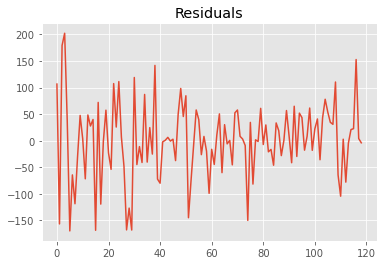

In [155]:
residuals8 = Y.Sc1 - prediction8
plt.plot(residuals8)
plt.title('Residuals')
plt.show

In [156]:
residuals8 = Y.Sc1 - prediction8
xs_with_constant = sm.add_constant(X)

name = ['Jarque-Bera', 'JB P-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(residuals8)
lzip(name, test)

[('Jarque-Bera', 2.2233681994046552),
 ('JB P-value', 0.3290044180109136),
 ('Skew', -0.1848825951840123),
 ('Kurtosis', 3.5582867517229295)]

In [157]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test = sms.het_breuschpagan(residuals8, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 10.48582094628962),
 ('p-value', 0.39895227244871834),
 ('f-value', 1.0436135370279591),
 ('f p-value', 0.4124536744304671)]

In [158]:
dw_pvalue8=sm.stats.stattools.durbin_watson(residuals8)
print("\n","Durbin Watson Test Statistics", dw_pvalue8)


 Durbin Watson Test Statistics 1.9552491063855395


### 9. HOc1

In [204]:
Y.HOc1=df['HOc1']
X=df[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]
X=sm.add_constant(X)

model = sm.OLS(Y.HOc1,X)
results9 = model.fit()
results9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   HOc1   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     3.167
Date:                Mon, 30 May 2022   Prob (F-statistic):            0.00136
Time:                        12:05:02   Log-Likelihood:                 47.228
No. Observations:                 119   AIC:                            -72.46
Df Residuals:                     108   BIC:                            -41.89
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.016      0.025      0.980      -0.031       0.032
TNX            0.0264      0.013      1.967      0.052      -0.000       0.053
VIX           -0.0252      0.011     -2.313      0.023      -0.047      -0.004
USNFAR=ECI -1.719e-07   2.08e-07     -0.828      0.410   -5.83e-07     2.4e-07
EUIPY=ECI     -0.0068      0.029     -0.234      0.815      -0.065       0.051
USCURA=ECI  4.215e-12   4.15e-12      1.015      0.312   -4.02e-12    1.24e-11
EURAST=ECI  1.792e-13   8.37e-13      0.214      0.831   -1.48e-12    1.84e-12
USGDPF=ECI     0.0110      0.015      0.717      0.475      -0.020       0.042
EUGDPY=ECI    -0.0376      0.049     -0.770      0.443      -0.134       0.059
CNGDPA=ECI    -0.0248      0.036     -0.686      0.494      -0.096       0.047
BRGDPY=ECI     0.0647      0.045      1.446      0.151      -0.024       0.153
==============================================================================
Omnibus:                       10.182   Durbin-Watson:                   2.380
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               23.186
Skew:                          -0.162   Prob(JB):                     9.23e-06
Kurtosis:                       5.138   Cond. No.                     1.85e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [205]:
regression9 = pd.DataFrame(Y.HOc1)

prediction9 = results9.predict()

regression9['Prediction']=prediction9
regression9.head()

,HOc1,Prediction
0,0.0150,-0.057256
1,-0.4772,-0.057256
2,-0.0102,-0.057256
3,0.1457,0.065352
4,0.3279,0.065352


<function matplotlib.pyplot.show(close=None, block=None)>

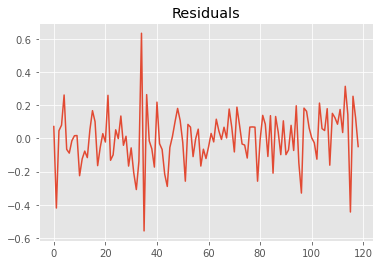

In [149]:
residuals9 = Y.HOc1 - prediction9
plt.plot(residuals9)
plt.title('Residuals')
plt.show

In [150]:
residuals9 = Y.HOc1 - prediction9
xs_with_constant = sm.add_constant(X)

name = ['Jarque-Bera', 'JB P-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(residuals9)
lzip(name, test)

[('Jarque-Bera', 23.18565116602242),
 ('JB P-value', 9.2320855366056e-06),
 ('Skew', -0.16168242069382144),
 ('Kurtosis', 5.138114331253155)]

In [151]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test = sms.het_breuschpagan(residuals9, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 20.550991111028388),
 ('p-value', 0.024451473149411467),
 ('f-value', 2.2544737270988398),
 ('f p-value', 0.019644922082223484)]

In [152]:
dw_pvalue9=sm.stats.stattools.durbin_watson(residuals9)
print("\n","Durbin Watson Test Statistics", dw_pvalue9)


 Durbin Watson Test Statistics 2.380246286262141


### 10. Cc1

In [206]:
Y.Cc1=df['Cc1']
X=df[['TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI']]
X=sm.add_constant(X)

model = sm.OLS(Y.Cc1,X)
results10 = model.fit()
results10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cc1   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1.935
Date:                Mon, 30 May 2022   Prob (F-statistic):             0.0479
Time:                        12:05:29   Log-Likelihood:                -608.69
No. Observations:                 119   AIC:                             1239.
Df Residuals:                     108   BIC:                             1270.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4315      3.937     -0.110      0.913      -8.235       7.372
TNX           -3.6714      3.319     -1.106      0.271     -10.251       2.908
VIX           -0.9406      2.695     -0.349      0.728      -6.283       4.402
USNFAR=ECI  2.041e-05   5.14e-05      0.397      0.692   -8.15e-05       0.000
EUIPY=ECI     -2.3445      7.218     -0.325      0.746     -16.652      11.963
USCURA=ECI   -8.5e-10   1.03e-09     -0.827      0.410   -2.89e-09    1.19e-09
EURAST=ECI -2.896e-10   2.07e-10     -1.396      0.165   -7.01e-10    1.21e-10
USGDPF=ECI    -2.7518      3.817     -0.721      0.473     -10.318       4.814
EUGDPY=ECI     3.3061     12.091      0.273      0.785     -20.660      27.272
CNGDPA=ECI     4.8170      8.953      0.538      0.592     -12.929      22.563
BRGDPY=ECI    15.0245     11.084      1.356      0.178      -6.945      36.994
==============================================================================
Omnibus:                       27.771   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.143
Skew:                          -0.609   Prob(JB):                     2.46e-28
Kurtosis:                       7.915   Cond. No.                     1.85e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [207]:
regression10 = pd.DataFrame(Y.Cc1)

prediction10 = results10.predict()

regression10['Prediction']=prediction10
regression10.head()

,Cc1,Prediction
0,16.25,-2.125694
1,-105.00,-2.125694
2,117.25,-2.125694
3,134.00,-0.261110
4,-3.75,-0.261110


<function matplotlib.pyplot.show(close=None, block=None)>

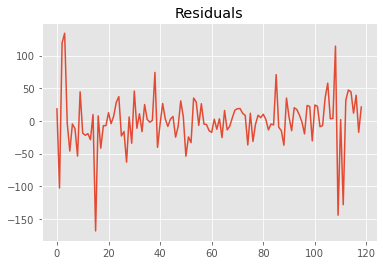

In [142]:
residuals10 = Y.Cc1 - prediction10
plt.plot(residuals10)
plt.title('Residuals')
plt.show

In [209]:
residuals10 = Y.Cc1 - prediction10
xs_with_constant = sm.add_constant(X)

name = ['Jarque-Bera', 'JB P-value', 'Skew', 'Kurtosis']
test = sms.jarque_bera(residuals10)
lzip(name, test)

[('Jarque-Bera', 127.1427627148066),
 ('JB P-value', 2.462067013271926e-28),
 ('Skew', -0.6094813213538138),
 ('Kurtosis', 7.914912810430275)]

In [210]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test = sms.het_breuschpagan(residuals10, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 10.838307916955968),
 ('p-value', 0.3702533827466524),
 ('f-value', 1.0822105613256618),
 ('f p-value', 0.38224511490733126)]

In [211]:
dw_pvalue10=sm.stats.stattools.durbin_watson(residuals10)
print("\n","Durbin Watson Test Statistics", dw_pvalue10)


 Durbin Watson Test Statistics 2.240566824796741


# Most Promising Regressions

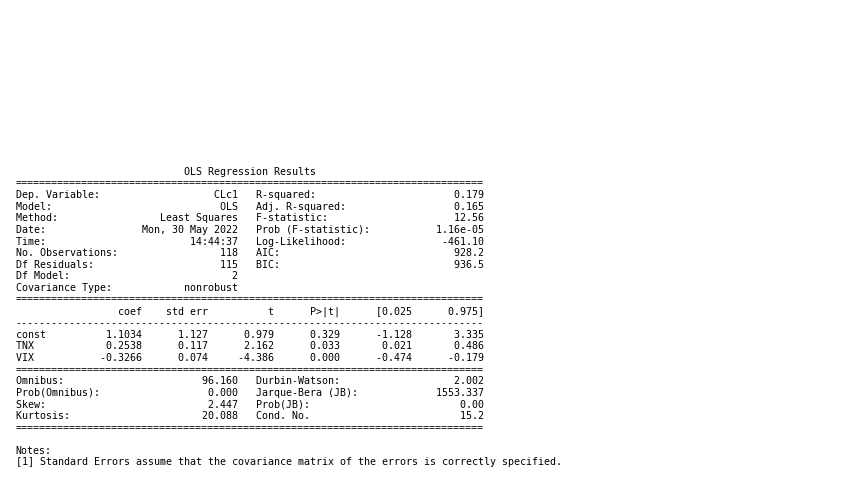

In [272]:
Y.nCLc1=df['CLc1']
X=df[['TNX', 'VIX']]
X=sm.add_constant(X)

model = sm.OLS(Y.nCLc1,X)
resultsaa = model.fit()
resultsaa.summary()

plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(resultsaa.summary()), {'fontsize': 10}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout()
plt.savefig('OLS CLc1.png')

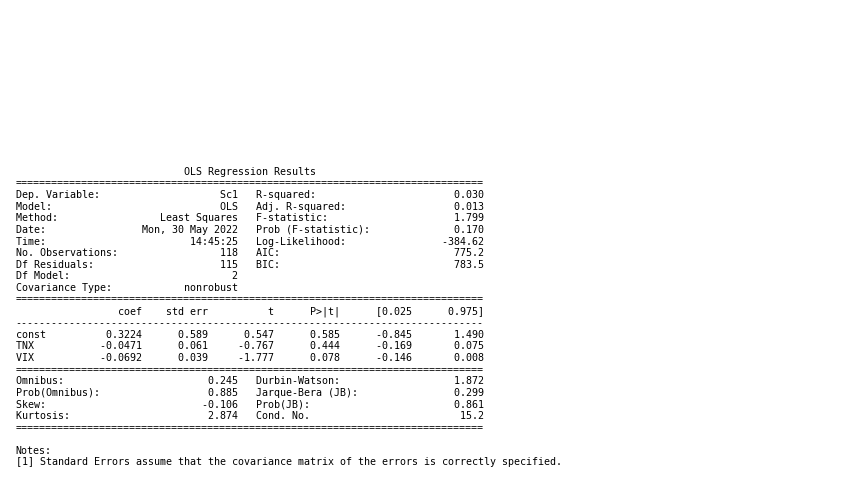

In [273]:
Y.nSc1=df['Sc1']
X=df[['TNX', 'VIX']]
X=sm.add_constant(X)

model = sm.OLS(Y.nSc1,X)
resultsbb = model.fit()
resultsbb.summary()

plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(resultsbb.summary()), {'fontsize': 10}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout()
plt.savefig('OLS Sc1.png')

# Additional - Trial and Error

## Multivariate OLS Regressions using %Change Data

In [212]:
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data as web
import pandas_datareader.data as web
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy
import seaborn as sns
import xlsxwriter

import math
from math import exp, sqrt, log

%matplotlib inline

from scipy import stats


import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms


import xlsxwriter

import datetime
start = datetime.datetime(2012, 3, 31)
end = datetime.datetime(2022, 2, 28)

y_variables=pd.read_excel(r'C:\Users\Philné\Desktop\ZHAW\Semester 2\Advanced Quantitative Methods\Projects\AQM\Databases\WORKING\AQM_Dataset.xlsx',index_col=0,usecols=['Date','CLc1','LCOc1','GCc1','SIc1','PLc1','NGc1','Wc1','Sc1','HOc1','Cc1'])
x_variables=pd.read_excel(r'C:\Users\Philné\Desktop\ZHAW\Semester 2\Advanced Quantitative Methods\Projects\AQM\Databases\WORKING\AQM_Dataset.xlsx',index_col=0,usecols=['Date','TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI'])

In [213]:
y_variables.head()

,CLc1,LCOc1,GCc1,SIc1,PLc1,NGc1,Wc1,Sc1,HOc1,Cc1
Date,,,,,,,,,,
2012-03-31,103.02,122.88,1669.3,32.469,1638.3,2.126,660.75,1403.00,3.1684,644.00
2012-04-30,104.87,119.47,1663.4,30.959,1567.7,2.285,647.75,1503.00,3.1834,660.25
2012-05-31,86.53,101.87,1562.6,27.741,1416.1,2.422,643.75,1340.00,2.7062,555.25
2012-06-30,84.96,97.80,1603.5,27.580,1449.1,2.824,739.00,1512.75,2.6960,672.50
2012-07-31,88.06,104.92,1610.5,27.895,1415.4,3.209,888.25,1721.00,2.8417,806.50


In [214]:
x_variables.head()

,TNX,VIX,USNFAR=ECI,EUIPY=ECI,USCURA=ECI,EURAST=ECI,USGDPF=ECI,EUGDPY=ECI,CNGDPA=ECI,BRGDPY=ECI
Date,,,,,,,,,,
2012-03-31,22.160000,15.500000,285333.333333,-1.833333,-1.139000e+11,6.711900e+11,1.9,-0.500000,1.900000,1.700000
2012-04-30,20.303333,16.026667,218555.555556,-1.977778,-1.126000e+11,6.812800e+11,1.7,-0.600000,1.966667,1.466667
2012-05-31,18.446667,16.553333,151777.777778,-2.122222,-1.113000e+11,6.913700e+11,1.5,-0.700000,2.033333,1.233333
2012-06-30,16.590000,17.080000,85000.000000,-2.266667,-1.100000e+11,7.014600e+11,1.3,-0.800000,2.100000,1.000000
2012-07-31,16.516667,16.630000,113444.444444,-2.211111,-1.062667e+11,7.122300e+11,1.9,-0.866667,2.033333,1.500000


In [215]:
pct_y_variables=y_variables.pct_change()*100
pct_y_variables.dropna(inplace=True)
pct_y_variables.head()

,CLc1,LCOc1,GCc1,SIc1,PLc1,NGc1,Wc1,Sc1,HOc1,Cc1
Date,,,,,,,,,,
2012-04-30,1.795768,-2.775065,-0.353442,-4.650590,-4.309345,7.478833,-1.967461,7.127584,0.473425,2.523292
2012-05-31,-17.488319,-14.731732,-6.059877,-10.394393,-9.670218,5.995624,-0.617522,-10.844977,-14.990262,-15.903067
2012-06-30,-1.814400,-3.995288,2.617432,-0.580368,2.330344,16.597853,14.796117,12.891791,-0.376912,21.116614
2012-07-31,3.648776,7.280164,0.436545,1.142132,-2.325581,13.633144,20.196211,13.766320,5.404303,19.925651
2012-08-31,9.550307,9.197484,4.601056,12.457430,8.541755,-12.776566,-2.054602,2.527600,11.538868,-0.464972


In [216]:
pct_y_variables.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2012-04-30 to 2022-02-28
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLc1    119 non-null    float64
 1   LCOc1   119 non-null    float64
 2   GCc1    119 non-null    float64
 3   SIc1    119 non-null    float64
 4   PLc1    119 non-null    float64
 5   NGc1    119 non-null    float64
 6   Wc1     119 non-null    float64
 7   Sc1     119 non-null    float64
 8   HOc1    119 non-null    float64
 9   Cc1     119 non-null    float64
dtypes: float64(10)
memory usage: 10.2 KB


In [217]:
pct_x_variables=x_variables.pct_change()*100
pct_x_variables.dropna(inplace=True)
pct_x_variables.head()

,TNX,VIX,USNFAR=ECI,EUIPY=ECI,USCURA=ECI,EURAST=ECI,USGDPF=ECI,EUGDPY=ECI,CNGDPA=ECI,BRGDPY=ECI
Date,,,,,,,,,,
2012-04-30,-8.378460,3.397849,-23.403427,7.878788,-1.141352,1.503300,-10.526316,20.000000,3.508772,-13.725490
2012-05-31,-9.144640,3.286190,-30.554143,7.303371,-1.154529,1.481036,-11.764706,16.666667,3.389831,-15.909091
2012-06-30,-10.065052,3.181635,-43.997072,6.806283,-1.168014,1.459421,-13.333333,14.285714,3.278689,-18.918919
2012-07-31,-0.442033,-2.634660,33.464052,-2.450980,-3.393939,1.535369,46.153846,8.333333,-3.174603,50.000000
2012-08-31,-0.443996,-2.705953,25.073457,-2.512563,-3.513174,1.512152,31.578947,7.692308,-3.278689,33.333333


In [218]:
pct_x_variables.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2012-04-30 to 2022-02-28
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TNX         119 non-null    float64
 1   VIX         119 non-null    float64
 2   USNFAR=ECI  119 non-null    float64
 3   EUIPY=ECI   119 non-null    float64
 4   USCURA=ECI  119 non-null    float64
 5   EURAST=ECI  119 non-null    float64
 6   USGDPF=ECI  119 non-null    float64
 7   EUGDPY=ECI  119 non-null    float64
 8   CNGDPA=ECI  119 non-null    float64
 9   BRGDPY=ECI  119 non-null    float64
dtypes: float64(10)
memory usage: 10.2 KB


In [219]:
pct_y_variables.isna().sum()

CLc1     0
LCOc1    0
GCc1     0
SIc1     0
PLc1     0
NGc1     0
Wc1      0
Sc1      0
HOc1     0
Cc1      0
dtype: int64

In [220]:
pct_x_variables.isna().sum()

TNX           0
VIX           0
USNFAR=ECI    0
EUIPY=ECI     0
USCURA=ECI    0
EURAST=ECI    0
USGDPF=ECI    0
EUGDPY=ECI    0
CNGDPA=ECI    0
BRGDPY=ECI    0
dtype: int64

In [221]:
np.isinf(pct_y_variables).sum()

CLc1     0
LCOc1    0
GCc1     0
SIc1     0
PLc1     0
NGc1     0
Wc1      0
Sc1      0
HOc1     0
Cc1      0
dtype: int64

In [222]:
np.isinf(pct_x_variables).sum()

TNX           0
VIX           0
USNFAR=ECI    0
EUIPY=ECI     0
USCURA=ECI    0
EURAST=ECI    0
USGDPF=ECI    0
EUGDPY=ECI    1
CNGDPA=ECI    0
BRGDPY=ECI    0
dtype: int64

In [223]:
df_y_variables = pd.DataFrame(pct_y_variables)
df_x_variables = pd.DataFrame(pct_x_variables)

In [224]:
df_y_variables.head()

,CLc1,LCOc1,GCc1,SIc1,PLc1,NGc1,Wc1,Sc1,HOc1,Cc1
Date,,,,,,,,,,
2012-04-30,1.795768,-2.775065,-0.353442,-4.650590,-4.309345,7.478833,-1.967461,7.127584,0.473425,2.523292
2012-05-31,-17.488319,-14.731732,-6.059877,-10.394393,-9.670218,5.995624,-0.617522,-10.844977,-14.990262,-15.903067
2012-06-30,-1.814400,-3.995288,2.617432,-0.580368,2.330344,16.597853,14.796117,12.891791,-0.376912,21.116614
2012-07-31,3.648776,7.280164,0.436545,1.142132,-2.325581,13.633144,20.196211,13.766320,5.404303,19.925651
2012-08-31,9.550307,9.197484,4.601056,12.457430,8.541755,-12.776566,-2.054602,2.527600,11.538868,-0.464972


In [225]:
df_x_variables.head()

,TNX,VIX,USNFAR=ECI,EUIPY=ECI,USCURA=ECI,EURAST=ECI,USGDPF=ECI,EUGDPY=ECI,CNGDPA=ECI,BRGDPY=ECI
Date,,,,,,,,,,
2012-04-30,-8.378460,3.397849,-23.403427,7.878788,-1.141352,1.503300,-10.526316,20.000000,3.508772,-13.725490
2012-05-31,-9.144640,3.286190,-30.554143,7.303371,-1.154529,1.481036,-11.764706,16.666667,3.389831,-15.909091
2012-06-30,-10.065052,3.181635,-43.997072,6.806283,-1.168014,1.459421,-13.333333,14.285714,3.278689,-18.918919
2012-07-31,-0.442033,-2.634660,33.464052,-2.450980,-3.393939,1.535369,46.153846,8.333333,-3.174603,50.000000
2012-08-31,-0.443996,-2.705953,25.073457,-2.512563,-3.513174,1.512152,31.578947,7.692308,-3.278689,33.333333


In [226]:
# Replace infinite updated data with nan
df_x_variables.replace([np.inf, -np.inf], np.nan, inplace=True)

In [227]:
df_y_variables.isna().sum()

CLc1     0
LCOc1    0
GCc1     0
SIc1     0
PLc1     0
NGc1     0
Wc1      0
Sc1      0
HOc1     0
Cc1      0
dtype: int64

In [228]:
df_x_variables.isna().sum()

TNX           0
VIX           0
USNFAR=ECI    0
EUIPY=ECI     0
USCURA=ECI    0
EURAST=ECI    0
USGDPF=ECI    0
EUGDPY=ECI    1
CNGDPA=ECI    0
BRGDPY=ECI    0
dtype: int64

In [229]:
np.isinf(df_y_variables).sum()

CLc1     0
LCOc1    0
GCc1     0
SIc1     0
PLc1     0
NGc1     0
Wc1      0
Sc1      0
HOc1     0
Cc1      0
dtype: int64

In [230]:
np.isinf(df_x_variables).sum()

TNX           0
VIX           0
USNFAR=ECI    0
EUIPY=ECI     0
USCURA=ECI    0
EURAST=ECI    0
USGDPF=ECI    0
EUGDPY=ECI    0
CNGDPA=ECI    0
BRGDPY=ECI    0
dtype: int64

In [231]:
df_y_variables.to_excel("youtput.xlsx",
             sheet_name='Sheet_name_y') 

In [232]:
df_x_variables.to_excel("xoutput.xlsx",
             sheet_name='Sheet_name_x') 

In [233]:
#import realigned data

In [234]:
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data as web
import pandas_datareader.data as web
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy
import seaborn as sns
import xlsxwriter

import math
from math import exp, sqrt, log

%matplotlib inline

from scipy import stats


import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms


import xlsxwriter

import datetime
start = datetime.datetime(2012, 3, 31)
end = datetime.datetime(2022, 2, 28)

aligned_y_variables=pd.read_excel(r'C:\Users\Philné\Desktop\ZHAW\Semester 2\Advanced Quantitative Methods\Projects\AQM\Databases\WORKING\Realigned AQM pct change.xlsx',index_col=0,usecols=['Date','CLc1','LCOc1','GCc1','SIc1','PLc1','NGc1','Wc1','Sc1','HOc1','Cc1'])
aligned_x_variables=pd.read_excel(r'C:\Users\Philné\Desktop\ZHAW\Semester 2\Advanced Quantitative Methods\Projects\AQM\Databases\WORKING\Realigned AQM pct change.xlsx',index_col=0,usecols=['Date','TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI'])

In [235]:
aligned_y_variables.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 2012-04-30 to 2022-02-28
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLc1    118 non-null    float64
 1   LCOc1   118 non-null    float64
 2   GCc1    118 non-null    float64
 3   SIc1    118 non-null    float64
 4   PLc1    118 non-null    float64
 5   NGc1    118 non-null    float64
 6   Wc1     118 non-null    float64
 7   Sc1     118 non-null    float64
 8   HOc1    118 non-null    float64
 9   Cc1     118 non-null    float64
dtypes: float64(10)
memory usage: 10.1 KB


In [236]:
aligned_x_variables.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 2012-04-30 to 2022-02-28
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TNX         118 non-null    float64
 1   VIX         118 non-null    float64
 2   USNFAR=ECI  118 non-null    float64
 3   EUIPY=ECI   118 non-null    float64
 4   USCURA=ECI  118 non-null    float64
 5   EURAST=ECI  118 non-null    float64
 6   USGDPF=ECI  118 non-null    float64
 7   EUGDPY=ECI  118 non-null    float64
 8   CNGDPA=ECI  118 non-null    float64
 9   BRGDPY=ECI  118 non-null    float64
dtypes: float64(10)
memory usage: 10.1 KB


In [237]:
aligned_y_variables.isna().sum()

CLc1     0
LCOc1    0
GCc1     0
SIc1     0
PLc1     0
NGc1     0
Wc1      0
Sc1      0
HOc1     0
Cc1      0
dtype: int64

In [238]:
aligned_x_variables.isna().sum()

TNX           0
VIX           0
USNFAR=ECI    0
EUIPY=ECI     0
USCURA=ECI    0
EURAST=ECI    0
USGDPF=ECI    0
EUGDPY=ECI    0
CNGDPA=ECI    0
BRGDPY=ECI    0
dtype: int64

In [239]:
np.isinf(aligned_y_variables).sum()

CLc1     0
LCOc1    0
GCc1     0
SIc1     0
PLc1     0
NGc1     0
Wc1      0
Sc1      0
HOc1     0
Cc1      0
dtype: int64

In [240]:
np.isinf(aligned_x_variables).sum()

TNX           0
VIX           0
USNFAR=ECI    0
EUIPY=ECI     0
USCURA=ECI    0
EURAST=ECI    0
USGDPF=ECI    0
EUGDPY=ECI    0
CNGDPA=ECI    0
BRGDPY=ECI    0
dtype: int64

In [241]:
#aligned_y_variables = 'CLc1','LCOc1','GCc1','SIc1','PLc1','NGc1','Wc1','Sc1','HOc1','Cc1'
#aligned_x_variables = 'TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI'

In [243]:
#create a new dataframe

In [242]:
df = pd.read_excel(r'C:\Users\Philné\Desktop\ZHAW\Semester 2\Advanced Quantitative Methods\Projects\AQM\Databases\WORKING\Realigned AQM pct change.xlsx')

In [244]:
#define independent and dependent variables

In [245]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

,00,Date,CLc1,LCOc1,GCc1,SIc1,PLc1,NGc1,Wc1,Sc1,...,TNX,VIX,USNFAR=ECI,EUIPY=ECI,USCURA=ECI,EURAST=ECI,USGDPF=ECI,EUGDPY=ECI,CNGDPA=ECI,BRGDPY=ECI
0,1,2012-04-30,1.795768,-2.775065,-0.353442,-4.650590,-4.309345,7.478833,-1.967461,7.127584,...,-8.378460,3.397849,-23.403427,7.878788,-1.141352,1.503300,-10.526316,20.000000,3.508772,-13.725490
1,1,2012-05-31,-17.488319,-14.731732,-6.059877,-10.394393,-9.670218,5.995624,-0.617522,-10.844977,...,-9.144640,3.286190,-30.554143,7.303371,-1.154529,1.481036,-11.764706,16.666667,3.389831,-15.909091
2,1,2012-06-30,-1.814400,-3.995288,2.617432,-0.580368,2.330344,16.597853,14.796117,12.891791,...,-10.065052,3.181635,-43.997072,6.806283,-1.168014,1.459421,-13.333333,14.285714,3.278689,-18.918919
3,1,2012-07-31,3.648776,7.280164,0.436545,1.142132,-2.325581,13.633144,20.196211,13.766320,...,-0.442033,-2.634660,33.464052,-2.450980,-3.393939,1.535369,46.153846,8.333333,-3.174603,50.000000
4,1,2012-08-31,9.550307,9.197484,4.601056,12.457430,8.541755,-12.776566,-2.054602,2.527600,...,-0.443996,-2.705953,25.073457,-2.512563,-3.513174,1.512152,31.578947,7.692308,-3.278689,33.333333


In [248]:
y = df.drop(['00','TNX', 'VIX', 'USNFAR=ECI', 'EUIPY=ECI', 'USCURA=ECI', 'EURAST=ECI', 'USGDPF=ECI', 'EUGDPY=ECI', 'CNGDPA=ECI', 'BRGDPY=ECI'], axis = 1)

In [249]:
y

,Date,CLc1,LCOc1,GCc1,SIc1,PLc1,NGc1,Wc1,Sc1,HOc1,Cc1
0,2012-04-30,1.795768,-2.775065,-0.353442,-4.650590,-4.309345,7.478833,-1.967461,7.127584,0.473425,2.523292
1,2012-05-31,-17.488319,-14.731732,-6.059877,-10.394393,-9.670218,5.995624,-0.617522,-10.844977,-14.990262,-15.903067
2,2012-06-30,-1.814400,-3.995288,2.617432,-0.580368,2.330344,16.597853,14.796117,12.891791,-0.376912,21.116614
3,2012-07-31,3.648776,7.280164,0.436545,1.142132,-2.325581,13.633144,20.196211,13.766320,5.404303,19.925651
4,2012-08-31,9.550307,9.197484,4.601056,12.457430,8.541755,-12.776566,-2.054602,2.527600,11.538868,-0.464972
...,...,...,...,...,...,...,...,...,...,...,...
113,2021-10-31,11.382114,7.463067,1.578078,8.737115,6.108856,-7.516618,6.512750,-1.612261,6.606312,5.868654
114,2021-11-30,-20.808903,-16.366438,-0.527201,-4.927960,-9.121224,-15.831183,0.129408,-1.497067,-17.328954,-0.219974
115,2021-12-31,13.644606,10.216806,3.039017,2.473095,4.079430,-18.327129,-0.387722,9.159992,12.903382,4.629630
116,2022-01-31,17.205159,17.266650,-1.778386,-3.999486,5.682290,30.670241,-1.232566,12.173095,18.415519,5.520438


In [250]:
X=df.drop(['00','CLc1','LCOc1','GCc1','SIc1','PLc1','NGc1','Wc1','Sc1','HOc1','Cc1'], axis=1)

In [251]:
X

,Date,TNX,VIX,USNFAR=ECI,EUIPY=ECI,USCURA=ECI,EURAST=ECI,USGDPF=ECI,EUGDPY=ECI,CNGDPA=ECI,BRGDPY=ECI
0,2012-04-30,-8.378460,3.397849,-23.403427,7.878788,-1.141352,1.503300,-10.526316,20.000000,3.508772,-13.725490
1,2012-05-31,-9.144640,3.286190,-30.554143,7.303371,-1.154529,1.481036,-11.764706,16.666667,3.389831,-15.909091
2,2012-06-30,-10.065052,3.181635,-43.997072,6.806283,-1.168014,1.459421,-13.333333,14.285714,3.278689,-18.918919
3,2012-07-31,-0.442033,-2.634660,33.464052,-2.450980,-3.393939,1.535369,46.153846,8.333333,-3.174603,50.000000
4,2012-08-31,-0.443996,-2.705953,25.073457,-2.512563,-3.513174,1.512152,31.578947,7.692308,-3.278689,33.333333
...,...,...,...,...,...,...,...,...,...,...,...
113,2021-10-31,-0.370613,-8.527802,5.766871,-32.222222,-0.303168,1.816973,66.666667,5.982906,42.857143,-20.000000
114,2021-11-30,-0.371991,-9.322835,5.452436,-47.540984,-0.304090,1.784548,40.000000,5.645161,30.000000,-25.000000
115,2021-12-31,-0.373380,-10.281348,5.170517,-90.625000,-0.305018,1.753260,28.571429,5.343511,23.076923,-33.333333
116,2022-01-31,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333


In [252]:
#Initiate the theta values

In [253]:
theta = np.array([0]*len(X.columns))

In [254]:
theta

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [255]:
#Calculate the number of training data that is denoted as m in the formula

In [256]:
m=len(df)

In [257]:
m

118

In [258]:
#Define the hypothesis function

In [259]:
def hypothesis(theta, X):
    return theta*X

In [260]:
#Define the cost function using the formula of the cost function

In [261]:
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*100)

In [262]:
#Write the function for the gradient descent

In [263]:
def gradientDescent(X, y, theta, alpha, i):
    alpha = 0.05
    i = 1000
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [264]:
#Use the gradient descent function to get the final cost, the list of cost in each iteration, and the optimized parameters theta

In [265]:
gradientDescent

<function __main__.gradientDescent(X, y, theta, alpha, i)>

In [ ]:
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, 100)),y= y, color='blue')         
plt.scatter(x=list(range(0, 100)), y=y_hat, color='black')
plt.show()

...END...